#### Import Libraries

In [1]:
import pandas as pd
from datetime import date
from datetime import datetime
import time
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import squarify as sq
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
#from fim import arules
import arules

from operator import attrgetter
import matplotlib.colors as mcolors
#warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
#!pip3 install wheel

In [3]:
#!pip install fim-python

#### Preview all the columns to explore the DataFrame's

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#### Read all the csv's

In [5]:
df0 = pd.read_csv('all_items000000000000')
df1 = pd.read_csv('all_items000000000001')
df2 = pd.read_csv('all_items000000000002')
df3 = pd.read_csv('all_items000000000003')
df4 = pd.read_csv('all_items000000000004')
df5 = pd.read_csv('all_items000000000005')
df6 = pd.read_csv('all_items000000000006')
df7 = pd.read_csv('all_items000000000007')

#Checked whether we needed to exclude the headers,but finally there was no need
#df1 = pd.read_csv('all_items000000000001',header=None)

#### Checking info and data entries on  the files

In [6]:
#df0.info()
#df0.head()
#df1.info()
#df1.head()
#df2.info()
#df2.head()
#df3.info()
#df3.head()
#df4.info()
#df4.head()
#df5.info()
#df5.head()
#df6.info()
#df6.head()
#df7.info()
#df7.head()

## Concat all 0-7 csv's to one MAIN DataFrame

In [7]:
df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7])

In [8]:
#df['revenue'].info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982381 entries, 0 to 566668
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   user_pseudo_id            float64
 1   event_name                object 
 2   event_date                int64  
 3   event_timestamp           int64  
 4   continent                 object 
 5   sub_continent             object 
 6   country                   object 
 7   region                    object 
 8   city                      object 
 9   platform                  object 
 10  category                  object 
 11  mobile_brand_name         object 
 12  mobile_model_name         object 
 13  operating_system          object 
 14  operating_system_version  object 
 15  language                  object 
 16  browser                   object 
 17  browser_version           object 
 18  medium                    object 
 19  name                      object 
 20  source                   

In [10]:
df['event_name'].unique()

array(['purchase', 'view_item', 'add_to_cart', 'begin_checkout',
       'select_item', 'view_item_list', 'view_promotion',
       'select_promotion'], dtype=object)

In [11]:
#df.head()

-----------------------

#### Sampling/// to test our cleaning and tranformations in a fast manner

In [12]:
df_sample = df.sample(10000)

In [13]:
#df_sample.head()

In [14]:
#df_sample.info()

#### Fixing the event_date column to date format

In [15]:
df_sample['event_date']= pd.to_datetime(df_sample["event_date"], errors='ignore', format ='%Y%m%d')
df_sample['event_date']= pd.to_datetime(df_sample['event_date'])

In [16]:
#df_sample.head()

In [17]:
#df_sample.info()

#### Turning user_pseudo_id to string

In [18]:
df_sample['user_pseudo_id']=df_sample['user_pseudo_id'].astype(str)

In [19]:
#df_sample.info()

#### Cleaning event_timestamp 

In [20]:
#df_sample.info()

In [21]:
df_sample['event_timestamp'] = df_sample['event_timestamp'].astype(str)
def column_slicer(x):
    return x[0:10]

df_sample['event_timestamp'] = list(map(column_slicer,df_sample['event_timestamp']))
df_sample['event_timestamp'] = df_sample['event_timestamp'].astype(int)

In [22]:
def timestamp_fixer(x):
    y = time.ctime(x)
    return y

df_sample['event_timestamp'] = list(map(timestamp_fixer,df_sample['event_timestamp']))

In [23]:
#df_sample.head()

In [24]:
#df_sample.info()

#### Getting day of the transaction through timestamp

In [25]:
def day_of_timestamp(x):
    return x[0:4]

df_sample['timestamp_day'] = list(map(day_of_timestamp,df_sample['event_timestamp']))

In [26]:
#df_sample.head()

#### Getting the specific hour of the transaction

In [27]:
def hour_of_timestamp(x):
    return x[10:13]

df_sample['timestamp_hour'] = list(map(hour_of_timestamp,df_sample['event_timestamp'])) 

In [28]:
#df_sample.head()

## Applying all the aforementioned sampling actions to MAIN DataFrame

In [29]:
#Keep a key in case we need it (from user_pseudo_id & event_timestamp)
df["key"] = df['user_pseudo_id'].astype(str) + "-" + df["event_timestamp"].astype(str)

#Fixing the event_date column to date format
df['event_date']= pd.to_datetime(df["event_date"], errors='ignore', format ='%Y%m%d')
df['event_date']= pd.to_datetime(df['event_date'])

#Turning user_pseudo_id to string
df['user_pseudo_id']=df['user_pseudo_id'].astype(str)

#Function to fix timestamp
df['event_timestamp_new'] = pd.to_datetime(df['event_timestamp'], unit='us')

#Function to get the specific month of the transaction
df['timestamp_month'] = df['event_timestamp_new'].dt.to_period('M')

#Getting day of the transaction through timestamp
df['timestamp_day'] = df['event_timestamp_new'].dt.day_name()

#Getting hour of the transaction through timestamp
df['timestamp_hour'] = pd.to_datetime(df['event_timestamp_new'], format='%H:%M:%S').dt.hour

In [30]:
df.head()

user_pseudo_id event_name event_date   event_timestamp continent  \
0   7134559299.460105   purchase 2021-01-19  1611018792172903  Americas   
1   60695124.47422628   purchase 2020-12-10  1607595937529528      Asia   
2   37930099.37639175   purchase 2020-12-11  1607668690495989    Europe   
3   89140417.90026724   purchase 2020-12-30  1609369681078344      Asia   
4  27071010.171541177   purchase 2020-12-15  1608040284902110  Americas   

      sub_continent country            region           city platform  \
0  Northern America  Canada  British Columbia      (not set)      WEB   
1     Southern Asia   India        Tamil Nadu        Chennai      WEB   
2   Southern Europe   Italy         (not set)      (not set)      WEB   
3      Eastern Asia   China           Beijing        Beijing      WEB   
4  Northern America  Canada           Ontario  Richmond Hill      WEB   

  category mobile_brand_name mobile_model_name operating_system  \
0   mobile            Xiaomi           <Other>              Web   
1   mobile           Samsung           <Other>              Web   
2  desktop            Google            Chrome              Web   
3  desktop            Google            Chrome              Web   
4  desktop            Google        ChromeBook          <Other>   

  operating_system_version language          browser browser_version  \
0                       10    en-gb  Android Webview         <Other>   
1                       10      NaN  Android Webview         <Other>   
2                       10      NaN           Chrome            87.0   
3                  <Other>    en-us           Chrome         <Other>   
4                  <Other>       zh           Chrome            86.0   

     medium        name                           source  \
0  referral  (referral)  shop.googlemerchandisestore.com   
1   organic   (organic)                          <Other>   
2  referral  (referral)  shop.googlemerchandisestore.com   
3  referral  (referral)  shop.googlemerchandisestore.com   
4   organic   (organic)                           google   

                               item_name   brand  category_1  \
0                     Gift Card- $100.00     NaN  Gift Cards   
1           Google Incognito Techpack V2  Google        Bags   
2            Google Canteen Bottle Black  Google   Drinkware   
3  Google Laptop and Cell Phone Stickers  Google      Google   
4              Google Packable Bag Black  Google        Bags   

              variant item_index                 item_list_name     coupon  \
0  Single Option Only  (not set)  Not available in demo dataset  (not set)   
1  Single Option Only  (not set)                      (not set)  (not set)   
2  Single Option Only  (not set)                      (not set)  (not set)   
3  Single Option Only  (not set)  Not available in demo dataset  (not set)   
4  Single Option Only  (not set)                      (not set)  (not set)   

  item_location_id  item_price  user_ltv  item_quantity  revenue  promotion  \
0        (not set)       100.0      1200           12.0   1200.0         12   
1        (not set)        88.0      1260            8.0    704.0          1   
2        (not set)        19.0       576           30.0    576.0          1   
3        (not set)         3.0       480          160.0    480.0          1   
4        (not set)        16.0       525           30.0    480.0          1   

                                   key        event_timestamp_new  \
0   7134559299.460105-1611018792172903 2021-01-19 01:13:12.172903   
1   60695124.47422628-1607595937529528 2020-12-10 10:25:37.529528   
2   37930099.37639175-1607668690495989 2020-12-11 06:38:10.495989   
3   89140417.90026724-1609369681078344 2020-12-30 23:08:01.078344   
4  27071010.171541177-1608040284902110 2020-12-15 13:51:24.902110   

  timestamp_month timestamp_day  timestamp_hour  
0         2021-01       Tuesday               1  
1         2020-12      Thursday              10  
2         2020-12        F

In [31]:
#Exporting to csv to use in PowerBI

#df.to_csv('full_cleaned.csv')

In [32]:
#df.info()

#### Checking that everything is fine

In [33]:
df.head()
#df.info()
#df.describe()

user_pseudo_id event_name event_date   event_timestamp continent  \
0   7134559299.460105   purchase 2021-01-19  1611018792172903  Americas   
1   60695124.47422628   purchase 2020-12-10  1607595937529528      Asia   
2   37930099.37639175   purchase 2020-12-11  1607668690495989    Europe   
3   89140417.90026724   purchase 2020-12-30  1609369681078344      Asia   
4  27071010.171541177   purchase 2020-12-15  1608040284902110  Americas   

      sub_continent country            region           city platform  \
0  Northern America  Canada  British Columbia      (not set)      WEB   
1     Southern Asia   India        Tamil Nadu        Chennai      WEB   
2   Southern Europe   Italy         (not set)      (not set)      WEB   
3      Eastern Asia   China           Beijing        Beijing      WEB   
4  Northern America  Canada           Ontario  Richmond Hill      WEB   

  category mobile_brand_name mobile_model_name operating_system  \
0   mobile            Xiaomi           <Other>              Web   
1   mobile           Samsung           <Other>              Web   
2  desktop            Google            Chrome              Web   
3  desktop            Google            Chrome              Web   
4  desktop            Google        ChromeBook          <Other>   

  operating_system_version language          browser browser_version  \
0                       10    en-gb  Android Webview         <Other>   
1                       10      NaN  Android Webview         <Other>   
2                       10      NaN           Chrome            87.0   
3                  <Other>    en-us           Chrome         <Other>   
4                  <Other>       zh           Chrome            86.0   

     medium        name                           source  \
0  referral  (referral)  shop.googlemerchandisestore.com   
1   organic   (organic)                          <Other>   
2  referral  (referral)  shop.googlemerchandisestore.com   
3  referral  (referral)  shop.googlemerchandisestore.com   
4   organic   (organic)                           google   

                               item_name   brand  category_1  \
0                     Gift Card- $100.00     NaN  Gift Cards   
1           Google Incognito Techpack V2  Google        Bags   
2            Google Canteen Bottle Black  Google   Drinkware   
3  Google Laptop and Cell Phone Stickers  Google      Google   
4              Google Packable Bag Black  Google        Bags   

              variant item_index                 item_list_name     coupon  \
0  Single Option Only  (not set)  Not available in demo dataset  (not set)   
1  Single Option Only  (not set)                      (not set)  (not set)   
2  Single Option Only  (not set)                      (not set)  (not set)   
3  Single Option Only  (not set)  Not available in demo dataset  (not set)   
4  Single Option Only  (not set)                      (not set)  (not set)   

  item_location_id  item_price  user_ltv  item_quantity  revenue  promotion  \
0        (not set)       100.0      1200           12.0   1200.0         12   
1        (not set)        88.0      1260            8.0    704.0          1   
2        (not set)        19.0       576           30.0    576.0          1   
3        (not set)         3.0       480          160.0    480.0          1   
4        (not set)        16.0       525           30.0    480.0          1   

                                   key        event_timestamp_new  \
0   7134559299.460105-1611018792172903 2021-01-19 01:13:12.172903   
1   60695124.47422628-1607595937529528 2020-12-10 10:25:37.529528   
2   37930099.37639175-1607668690495989 2020-12-11 06:38:10.495989   
3   89140417.90026724-1609369681078344 2020-12-30 23:08:01.078344   
4  27071010.171541177-1608040284902110 2020-12-15 13:51:24.902110   

  timestamp_month timestamp_day  timestamp_hour  
0         2021-01       Tuesday               1  
1         2020-12      Thursday              10  
2         2020-12        F

In [34]:
#df['category'].unique()

#### Cheking the number of events based on user_pseudo_id

In [35]:
#list(df['event_name'].unique())
df.groupby(by=['category','event_name'])[['user_pseudo_id']].count().sort_values(['category','user_pseudo_id'], ascending=False)

user_pseudo_id
category event_name                      
tablet   view_item                  58313
         add_to_cart                14769
         select_item                 6700
         view_promotion              3022
         begin_checkout              1636
         purchase                     307
         select_promotion             169
mobile   view_item                1092755
         add_to_cart               264835
         select_item               125649
         view_promotion             53222
         begin_checkout             30312
         purchase                    6476
         select_promotion            3411
         view_item_list               276
desktop  view_item                1597178
         add_to_cart               387822
         select_item               197015
         view_promotion             78358
         begin_checkout             45727
         purchase                    9174
         select_promotion            5015
         view_item_list               240

#### GROUP by event name & browser

In [36]:
df.groupby(by=['browser','event_name'])[['user_pseudo_id']].count().sort_values(['browser','user_pseudo_id'], ascending=False)

user_pseudo_id
browser         event_name                      
Safari          view_item                 652803
                add_to_cart               157202
                select_item                76174
                view_promotion             32084
                begin_checkout             17809
                purchase                    3785
                select_promotion            2055
                view_item_list               156
Firefox         view_item                  46570
                add_to_cart                11337
                select_item                 5665
                view_promotion              2477
                begin_checkout              1314
                purchase                     213
                select_promotion             164
                view_item_list                12
Edge            view_item                  59050
                add_to_cart                13169
                select_item                 7223
                view_promotion              3081
                begin_checkout              1660
                purchase                     246
                select_promotion             187
Chrome          view_item                1877734
                add_to_cart               459729
                select_item               226954
                view_promotion             91608
                begin_checkout             53973
                purchase                   11114
                select_promotion            5827
                view_item_list               288
Android Webview view_item                  35085
                add_to_cart                 8383
                select_item                 3748
                view_promotion              1808
                begin_checkout               881
                purchase                     232
                select_promotion             146
                view_item_list                60
<Other>         view_item                  77004
                add_to_cart                17606
                select_item                 9600
                view_promotion              3544
                begin_checkout              2038
                purchase                     367
                select_promotion             216

#### Purchases grouped by Continent

In [37]:
df[df['event_name'] == 'purchase'].groupby(by=['continent'])[['user_pseudo_id']].count().sort_values('user_pseudo_id', ascending = False)

user_pseudo_id
continent                
Americas             9104
Asia                 3742
Europe               2795
Oceania               164
Africa                121
(not set)              31

#### Purchases grouped by Country

In [38]:
df_map_purchase = df[df['event_name'] == 'purchase'].groupby(by=['country'])[['user_pseudo_id']].count().sort_values('user_pseudo_id', ascending = False)
df_map_purchase

user_pseudo_id
country                             
United States                   7051
India                           1487
Canada                          1386
United Kingdom                   464
Spain                            391
France                           344
China                            287
Germany                          256
Turkey                           240
Taiwan                           238
Japan                            237
Brazil                           193
Singapore                        186
Netherlands                      179
Italy                            163
Australia                        151
South Korea                      150
Poland                           123
Malaysia                         121
Mexico                           120
Russia                           113
Colombia                         108
Indonesia                         99
Thailand                          97
Hong Kong                         90
Ireland                           87
Greece                            81
(not set)                         81
Philippines                       78
Peru                              77
Vietnam                           71
Sweden                            70
Portugal                          67
Switzerland                       66
Israel                            60
Pakistan                          57
Austria                           55
Czechia                           42
Belgium                           40
Slovenia                          38
Argentina                         33
Ukraine                           33
Egypt                             31
Bangladesh                        31
Nigeria                           31
Denmark                           31
Finland                           30
United Arab Emirates              29
Saudi Arabia                      28
Dominican Republic                27
Kuwait                            26
Sri Lanka                         23
Slovakia                          22
Morocco                           20
Iraq                              19
Chile                             17
Uruguay                           16
Romania                           14
Bulgaria                          13
New Zealand                       13
Ecuador                           12
North Macedonia                   12
Costa Rica                        12
Serbia                            11
Puerto Rico                       11
Kazakhstan                        11
Tunisia                           10
Hungary                            9
Palestine                          8
Georgia                            8
Malta                              8
South Africa                       8
Guatemala                          7
Lebanon                            7
Cyprus                             7
Macao                              7
El Salvador                        6
Paraguay                           5
Algeria                            5
Bahrain                            5
Mongolia                           5
Armenia                            4
Norway                             4
Belarus                            4
Albania                            4
Kenya                              4
Latvia                             4
Panama                             3
Cambodia                           3
Lithuania                          3
Bosnia & Herzegovina               3
Jordan                             3
Kosovo                             3
Bolivia                            2
Croatia                            2
Luxembourg                         1
Bahamas                            1
Qatar                              1
Iceland                            1
Honduras                           1
Venezuela                          1

In [39]:
#len(list(df['country'].unique()))

#### Reading file for constructing map with purchases

In [40]:
#Reading the csv
df_country = pd.read_excel('country.xls')

In [41]:
#df_country.head()

In [42]:
#Fixing the format
df_country = df_country['ISO 3166 Country Code,"Country","Latitude","Longitude"'].str.split(',', expand=True)

In [43]:
#df_country.head()

In [44]:
#Dropping uneccesary columns
df_country.drop(0,axis=1, inplace = True)
df_country.drop(4,axis=1, inplace = True)

In [45]:
#Renaming Columns
df_country.rename(columns = {1:'country', 2:'lat', 3:'long'}, inplace = True)
#df_country.head()

In [46]:
#Fixing the country column
df_country['country']=df_country['country'].str.replace(r'"','',regex=True)

In [47]:
#df_country.head()

#### Merging the country and main df

In [48]:
df_map_purchase = df_map_purchase.reset_index()

In [49]:
#df_map_purchase.head()

In [50]:
#Merging the datasets
df_merge = df_map_purchase.merge(df_country,on='country')
#df_map_purchase

In [51]:
#Dropping columns that are not needed
#df_merge.drop(0,axis=1, inplace = True)
#df_merge.drop(4,axis=1, inplace = True)

In [52]:
#df_merge.head()

In [53]:
#Fixing the type of the lattitude and longtitude columns
df_merge['lat']=df_merge['lat'].astype(float)
df_merge['long']=df_merge['long'].astype(float)
#df_merge.info()

In [54]:
df_merge.head()

country  user_pseudo_id   lat  long
0   United States            7051  38.0 -97.0
1           India            1487  20.0  77.0
2          Canada            1386  60.0 -95.0
3  United Kingdom             464  54.0  -2.0
4           Spain             391  40.0  -4.0

In [55]:
#Exporting to csv to use in PowerBI

#df_merge.to_csv('df_merge.csv')

### Testing out heatmap

In [56]:
# map_hooray = folium.Map(location=[df_merge['lat'].mean(), df_merge['long'].mean()],zoom_start = 3)
# map_hooray
# heat_data=[[row['lat'],row['long']] for index,row in df_merge.iterrows()]
# HeatMap(heat_data).add_to(map_hooray)
# location_map = map_hooray
# map_hooray

### Depicting purchase events based on countries with Folium

In [57]:
map_hooray = folium.Map(location=[df_merge['lat'].mean(), df_merge['long'].mean()],zoom_start = 3.2,tiles="Stamen Terrain")

#Stamen Toner
#cartodb positron
#Mapbox Control Room

#folium.TileLayer('MapQuest Open Aerial').add_to(map_hooray)
for i in range(0,len(df_merge)):
    folium.Circle(
      location=[df_merge.iloc[i]['lat'], df_merge.iloc[i]['long']],
      popup=df_merge.iloc[i]['country'],
      radius=float(df_merge.iloc[i]['user_pseudo_id'])*250,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(map_hooray)
    

#map_hooray

In [58]:
# iplot([go.Choropleth(
#     locationmode='country names',
#     locations=df_sample['country'],
#     text=df_sample['country'],
#     z=df_sample['revenue'])])

### Investigating

In [59]:
#FacetGrid Graphs examples

# g = sns.FacetGrid(df, col = "time")
# g.map(plt.hist, "tip")
# plt.show()

In [60]:
#df.groupby(by='continent')[['user_pseudo_id']].count()

In [61]:
#df.groupby(by='continent')[['user_pseudo_id']].count()

In [62]:
#df.groupby(by='revenue')[['user_pseudo_id']].count()

In [63]:
df.groupby(by=['key','event_name'])['user_pseudo_id'].count().reset_index().sort_values(['user_pseudo_id'],ascending=False).head(20)

#df5 = df.groupby(by=['key','event_name'])['user_pseudo_id'].count().reset_index().sort_values(['user_pseudo_id'],ascending=False).head(20)
#df5[df5['key']=='37489725.29715051-1608577906249290']

key      event_name  user_pseudo_id
173654   37489725.29715051-1608577906249290  begin_checkout              31
173655   37489725.29715051-1608577906371882  begin_checkout              31
173656   37489725.29715051-1608577906382870  begin_checkout              31
79853   2278219.0388083383-1607919740715426  begin_checkout              30
79854   2278219.0388083383-1607919740830105  begin_checkout              30
79855   2278219.0388083383-1607919975292661        purchase              30
223853   45732822.69587718-1605697746487379        purchase              28
440873   81093232.43068023-1608149085145303  begin_checkout              27
456946   8376952.218063824-1610968513808500  begin_checkout              27
440872   81093232.43068023-1608149084943511  begin_checkout              27
456944   8376952.218063824-1610968513738558  begin_checkout              27
440876   81093232.43068023-1608149661531334        purchase              27
440875   81093232.43068023-1608149204663746  begin_checkout              27
440874   81093232.43068023-1608149204392634  begin_checkout              27
456945   8376952.218063824-1610968513795432  begin_checkout              27
169508   36794743.01152661-1606207425334623        purchase              24
394097   73478648.48701017-1609099003678994  begin_checkout              24
169507   36794743.01152661-1606207425265661        purchase              24
394099   73478648.48701017-1609099003854329  begin_checkout              24
260616   51608821.02913553-1605090482532566        purchase              24

### Counting the unique values on the events & Browsers || based on the unique keys created 

In [64]:
df_ratios = df.groupby(by=['event_name'])[['key']].nunique()
df_ratios

key
event_name              
add_to_cart        58543
begin_checkout     31991
purchase            5690
select_item        31006
select_promotion    8595
view_item         241876
view_item_list        43
view_promotion    134602

#### Comparing the difference with above

In [65]:
df.groupby(by=['event_name'])[['key']].count()

key
event_name               
add_to_cart        667426
begin_checkout      77675
purchase            15957
select_item        329364
select_promotion     8595
view_item         2748246
view_item_list        516
view_promotion     134602

## Ratios

In [66]:
#Checking the ratios of the previous

print(f"Purchase / Begin Checkout Ratio is: {(df_ratios.loc['purchase']/df_ratios.loc['begin_checkout']*100)[0].round(2)}%")
print(f"Purchase / Add to Cart Ratio is: {(df_ratios.loc['purchase']/df_ratios.loc['add_to_cart']*100)[0].round(2)}%")



Purchase / Begin Checkout Ratio is: 17.79%
Purchase / Add to Cart Ratio is: 9.72%


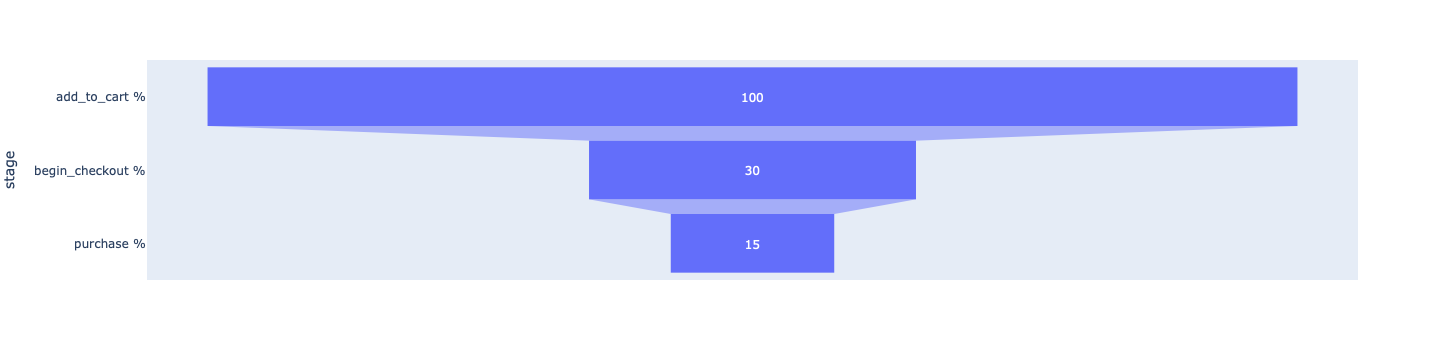

In [67]:
import plotly.express as px
data = dict(
    number=[100, 30, 15],
    stage=["add_to_cart %", "begin_checkout %", "purchase %"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

### Counting the unique values on the events & Browsers || based on the unique keys created 

In [68]:
#Pivoting just for the events' names that are valuable for investigation

df_browsers = df[(df['event_name'] == 'add_to_cart') | (df['event_name'] == 'begin_checkout') | (df['event_name'] == 'purchase')].groupby(by=['event_name','browser'])[['key']].nunique().reset_index()
df_pivot_browsers = df_browsers.pivot(index='browser', columns='event_name', values='key').sort_values(['add_to_cart'],ascending = False)#.style.background_gradient()
df_pivot_browsers

event_name       add_to_cart  begin_checkout  purchase
browser                                               
Chrome                 40345           21920      3891
Safari                 13769            7529      1392
<Other>                 1532             884       139
Edge                    1174             609        79
Firefox                  981             572        87
Android Webview          742             477       102

In [69]:
#Applying the 2 new columns for the ratios in the pivot table

df_pivot_browsers['ratio_purchase/checkout'] = df_pivot_browsers.apply(lambda x: (x['purchase']/x['begin_checkout']*100).round(2), axis=1)
df_pivot_browsers['ratio_purchase/add_to_cart'] = df_pivot_browsers.apply(lambda x: (x['purchase']/x['add_to_cart']*100).round(2), axis=1)

#Creating Second Pivot so to rest_index and plot with no problem
df_pivot_browsers2 = df_pivot_browsers.reset_index()
df_pivot_browsers2 = df_pivot_browsers2[['browser','ratio_purchase/checkout','ratio_purchase/add_to_cart']]
df_pivot_browsers2

event_name          browser  ratio_purchase/checkout  \
0                    Chrome                    17.75   
1                    Safari                    18.49   
2                   <Other>                    15.72   
3                      Edge                    12.97   
4                   Firefox                    15.21   
5           Android Webview                    21.38   

event_name  ratio_purchase/add_to_cart  
0                                 9.64  
1                                10.11  
2                                 9.07  
3                                 6.73  
4                                 8.87  
5                                13.75

In [70]:
stages = ["add_to_cart", "begin_checkout", "purchase"]
df_1 = pd.DataFrame(dict(number=[25, 17.75, 9.64], stage=stages))
df_1['browser'] = 'Chrome'
df_2 = pd.DataFrame(dict(number=[25, 18.49, 10.11], stage=stages))
df_2['browser'] = 'Safari'
df_3 = pd.DataFrame(dict(number=[25, 12.97, 6.73], stage=stages))
df_3['browser'] = 'Edge'
df_4 = pd.DataFrame(dict(number=[25, 15.21, 8.87], stage=stages))
df_4['browser'] = 'Firefox'
df_5 = pd.DataFrame(dict(number=[25, 21.38, 13.75], stage=stages))
df_5['browser'] = 'Android Webview'
df6 = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)
fig = px.funnel(df6, x='number', y='stage', color='browser')
fig.show()

In [71]:
#Exporting to csv to use in PowerBI

#df_pivot_browsers.to_csv('df_pivot_browsers.csv')

<AxesSubplot: xlabel='browser'>

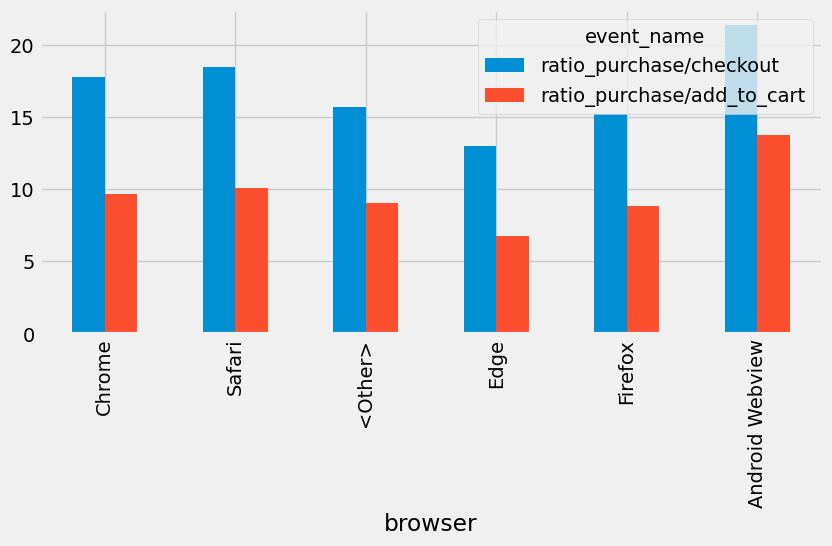

In [72]:
#Just plotting the pivot2 to see visually the results

df_pivot_browsers2.plot.bar(x='browser',figsize=(9,4))

### Counting the unique values on the events & Category || based on the unique keys created 

In [73]:
#Pivoting just for the events' names that are valuable for investigation

df_category = df[(df['event_name'] == 'add_to_cart') | (df['event_name'] == 'begin_checkout') | (df['event_name'] == 'purchase')].groupby(by=['event_name','category'])[['key']].nunique().reset_index()
df_pivot_category = df_category.pivot(index='category', columns='event_name', values='key').sort_values(['add_to_cart'],ascending = False)#.style.background_gradient()
df_pivot_category

event_name  add_to_cart  begin_checkout  purchase
category                                         
desktop           34047           18420      3226
mobile            23223           12906      2353
tablet             1273             665       111

In [74]:
#Applying the 2 new columns for the ratios in the pivot table

df_pivot_category['ratio_purchase/checkout'] = df_pivot_category.apply(lambda x: (x['purchase']/x['begin_checkout']*100).round(2), axis=1)
df_pivot_category['ratio_purchase/add_to_cart'] = df_pivot_category.apply(lambda x: (x['purchase']/x['add_to_cart']*100).round(2), axis=1)

#Creating Second Pivot so to rest_index and plot with no problem
df_pivot_category2 = df_pivot_category.reset_index()
df_pivot_category2 = df_pivot_category2[['category','ratio_purchase/checkout','ratio_purchase/add_to_cart']]
df_pivot_category2

event_name category  ratio_purchase/checkout  ratio_purchase/add_to_cart
0           desktop                    17.51                        9.48
1            mobile                    18.23                       10.13
2            tablet                    16.69                        8.72

In [75]:
#Exporting to csv to use in PowerBI

#df_pivot_category.to_csv('df_pivot_category.csv')

<AxesSubplot: xlabel='category'>

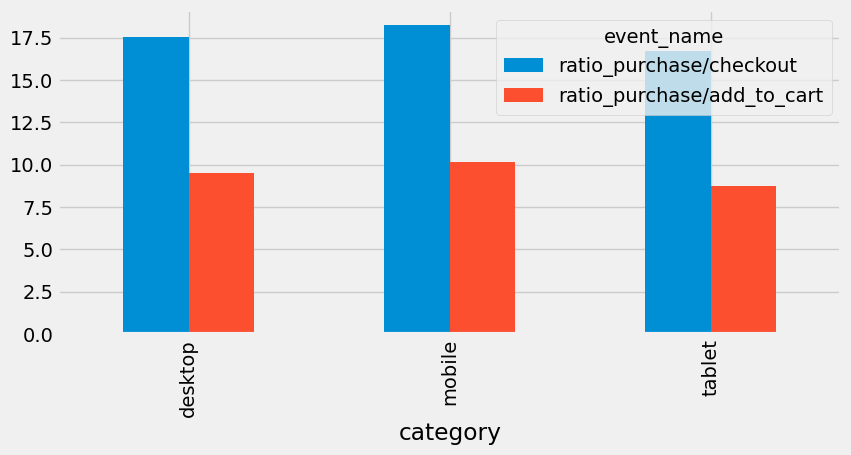

In [76]:
#Just plotting the pivot2 to see visually the results

df_pivot_category2.plot.bar(x='category',figsize=(9,4))

### Counting the unique values on the events & Medium || based on the unique keys created 

In [77]:
#Pivoting just for the events' names that are valuable for investigation

df_medium = df[(df['event_name'] == 'add_to_cart') | (df['event_name'] == 'begin_checkout') | (df['event_name'] == 'purchase')].groupby(by=['event_name','medium'])[['key']].nunique().reset_index()
df_pivot_medium = df_medium.pivot(index='medium', columns='event_name', values='key').sort_values(['add_to_cart'],ascending = False)#.style.background_gradient()
df_pivot_medium

event_name      add_to_cart  begin_checkout  purchase
medium                                               
organic               17604            9401      1571
(none)                13370            7109      1251
referral              11875            6833      1258
<Other>                7292            3590       606
(data deleted)         6360            4104       838
cpc                    2042             954       166

In [78]:
#Applying the 2 new columns for the ratios in the pivot table

df_pivot_medium['ratio_purchase/checkout'] = df_pivot_medium.apply(lambda x: (x['purchase']/x['begin_checkout']*100).round(2), axis=1)
df_pivot_medium['ratio_purchase/add_to_cart'] = df_pivot_medium.apply(lambda x: (x['purchase']/x['add_to_cart']*100).round(2), axis=1)

#Creating Second Pivot so to rest_index and plot with no problem
df_pivot_medium2 = df_pivot_medium.reset_index()
df_pivot_medium2 = df_pivot_medium2[['medium','ratio_purchase/checkout','ratio_purchase/add_to_cart']]
df_pivot_medium2

event_name          medium  ratio_purchase/checkout  \
0                  organic                    16.71   
1                   (none)                    17.60   
2                 referral                    18.41   
3                  <Other>                    16.88   
4           (data deleted)                    20.42   
5                      cpc                    17.40   

event_name  ratio_purchase/add_to_cart  
0                                 8.92  
1                                 9.36  
2                                10.59  
3                                 8.31  
4                                13.18  
5                                 8.13

In [79]:
#Exporting to csv to use in PowerBI

#df_pivot_medium.to_csv('df_pivot_medium.csv')

<AxesSubplot: xlabel='medium'>

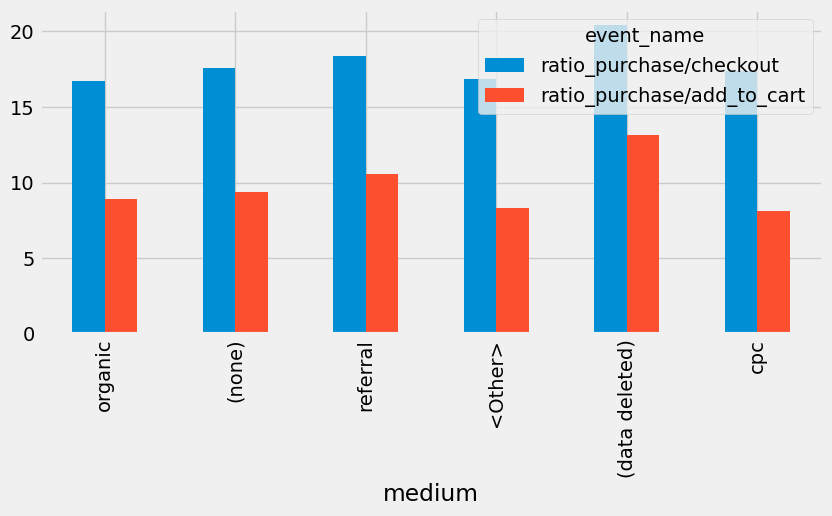

In [80]:
#Just plotting the pivot2 to see visually the results

df_pivot_medium2.plot.bar(x='medium',figsize=(9,4))

### Counting the unique values on the events & Sub_continent || based on the unique keys created 

In [81]:
#Pivoting just for the events' names that are valuable for investigation

df_sub_continent = df[(df['event_name'].isin(['add_to_cart'])) | (df['event_name'] == 'begin_checkout') | (df['event_name'] == 'purchase')].groupby(by=['event_name','sub_continent'])[['key']].nunique().reset_index()
df_pivot_sub_continent = df_sub_continent.pivot(index='sub_continent', columns='event_name', values='key').sort_values(['add_to_cart'],ascending = False)#.style.background_gradient()

#Slicing the DataFrame to see only the bigger values
df_pivot_sub_continent = df_pivot_sub_continent.head(13)
df_pivot_sub_continent

event_name        add_to_cart  begin_checkout  purchase
sub_continent                                          
Northern America      30797.0         16656.0    2947.0
Southern Asia          5729.0          2995.0     570.0
Eastern Asia           3602.0          2118.0     380.0
Western Europe         3458.0          1926.0     340.0
Northern Europe        2910.0          1688.0     269.0
Southern Europe        2893.0          1487.0     267.0
Southeast Asia         2289.0          1202.0     221.0
Eastern Europe         1765.0           996.0     161.0
South America          1685.0           898.0     172.0
Western Asia           1317.0           678.0     150.0
Central America         720.0           338.0      73.0
Australasia             502.0           447.0      58.0
Northern Africa         335.0           196.0      24.0

In [82]:
#Applying the 2 new columns for the ratios in the pivot table

df_pivot_sub_continent['ratio_purchase/checkout'] = df_pivot_sub_continent.apply(lambda x: (x['purchase']/x['begin_checkout']*100).round(2), axis=1)
df_pivot_sub_continent['ratio_purchase/add_to_cart'] = df_pivot_sub_continent.apply(lambda x: (x['purchase']/x['add_to_cart']*100).round(2), axis=1)

#Creating Second Pivot so to rest_index and plot with no problem
df_pivot_sub_continent2 = df_pivot_sub_continent.reset_index().sort_values('ratio_purchase/checkout',ascending=False)
df_pivot_sub_continent2 = df_pivot_sub_continent2[['sub_continent','ratio_purchase/checkout','ratio_purchase/add_to_cart']]
df_pivot_sub_continent2

event_name     sub_continent  ratio_purchase/checkout  \
9               Western Asia                    22.12   
10           Central America                    21.60   
8              South America                    19.15   
1              Southern Asia                    19.03   
6             Southeast Asia                    18.39   
5            Southern Europe                    17.96   
2               Eastern Asia                    17.94   
0           Northern America                    17.69   
3             Western Europe                    17.65   
7             Eastern Europe                    16.16   
4            Northern Europe                    15.94   
11               Australasia                    12.98   
12           Northern Africa                    12.24   

event_name  ratio_purchase/add_to_cart  
9                                11.39  
10                               10.14  
8                                10.21  
1                                 9.95  
6                                 9.65  
5                                 9.23  
2                                10.55  
0                                 9.57  
3                                 9.83  
7                                 9.12  
4                                 9.24  
11                               11.55  
12                                7.16

In [83]:
#Exporting to csv to use in PowerBI

#df_pivot_sub_continent.to_csv('df_pivot_sub_continent.csv')

<AxesSubplot: xlabel='sub_continent'>

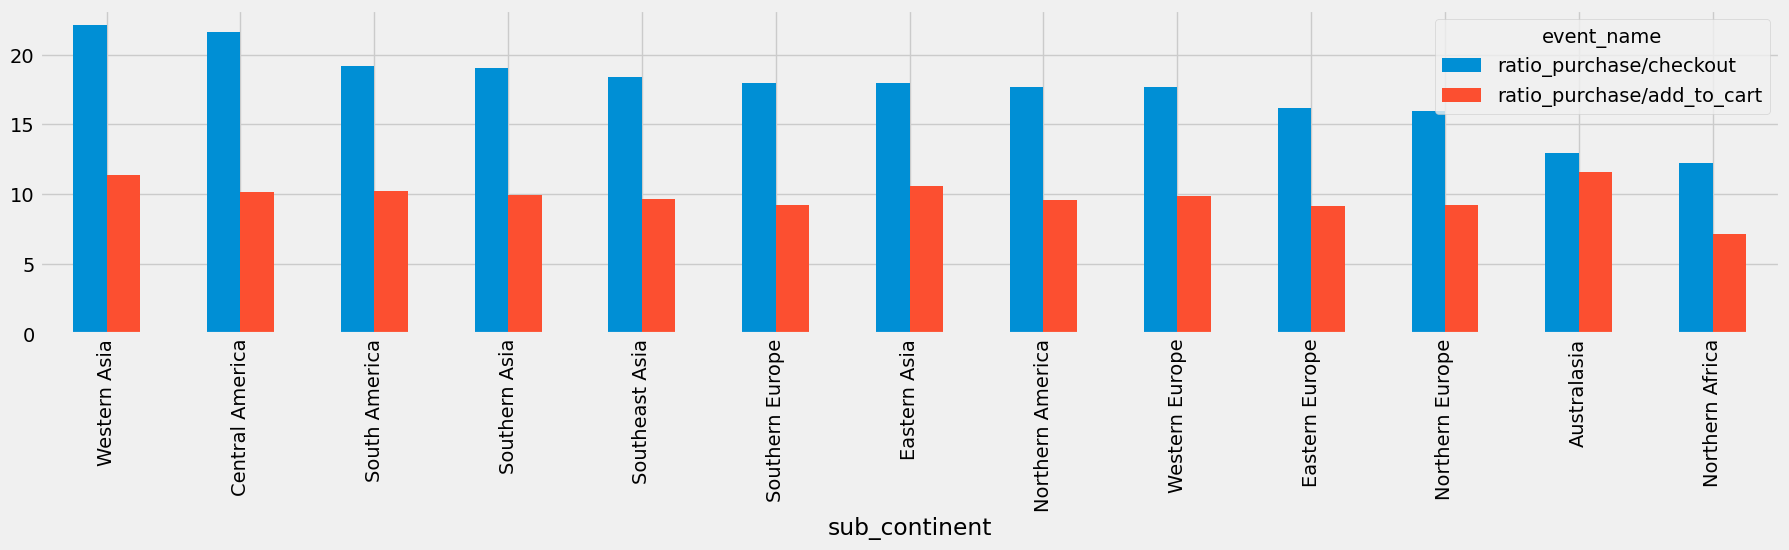

In [84]:
#Just plotting the pivot2 to see visually the results

df_pivot_sub_continent2.plot.bar(x='sub_continent',figsize=(20,4))

### Revenue Per City & per Region & per Country

<AxesSubplot: xlabel='city'>

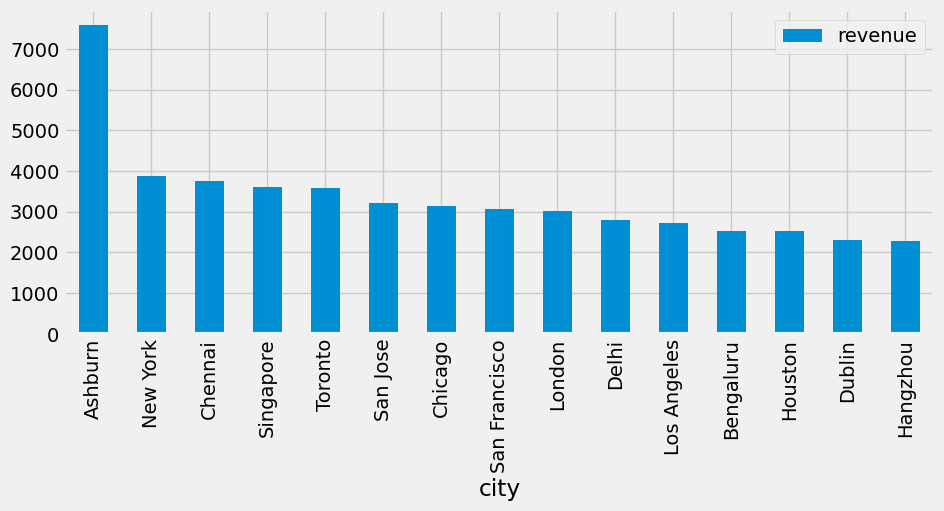

In [85]:
#Ploting directly on group by
df[df['city']!= '(not set)'].groupby('city')[['revenue']].sum().sort_values('revenue',ascending=False).reset_index().head(15).plot.bar(x='city',figsize=(10,4))

<AxesSubplot: xlabel='region'>

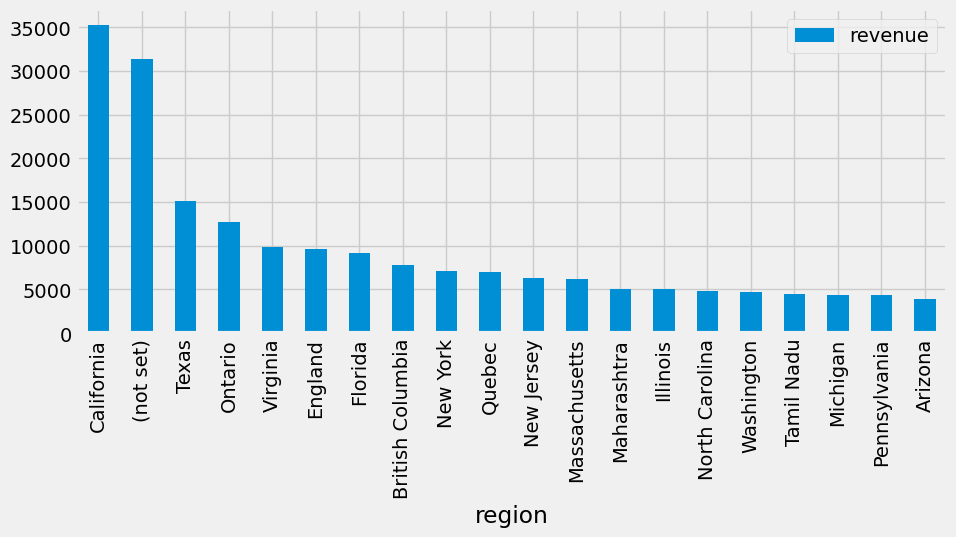

In [86]:
#Ploting directly on group by
df.groupby('region')[['revenue']].sum().sort_values('revenue',ascending=False).head(20).reset_index().head(20).plot.bar(x='region',figsize=(10,4))

<AxesSubplot: xlabel='country'>

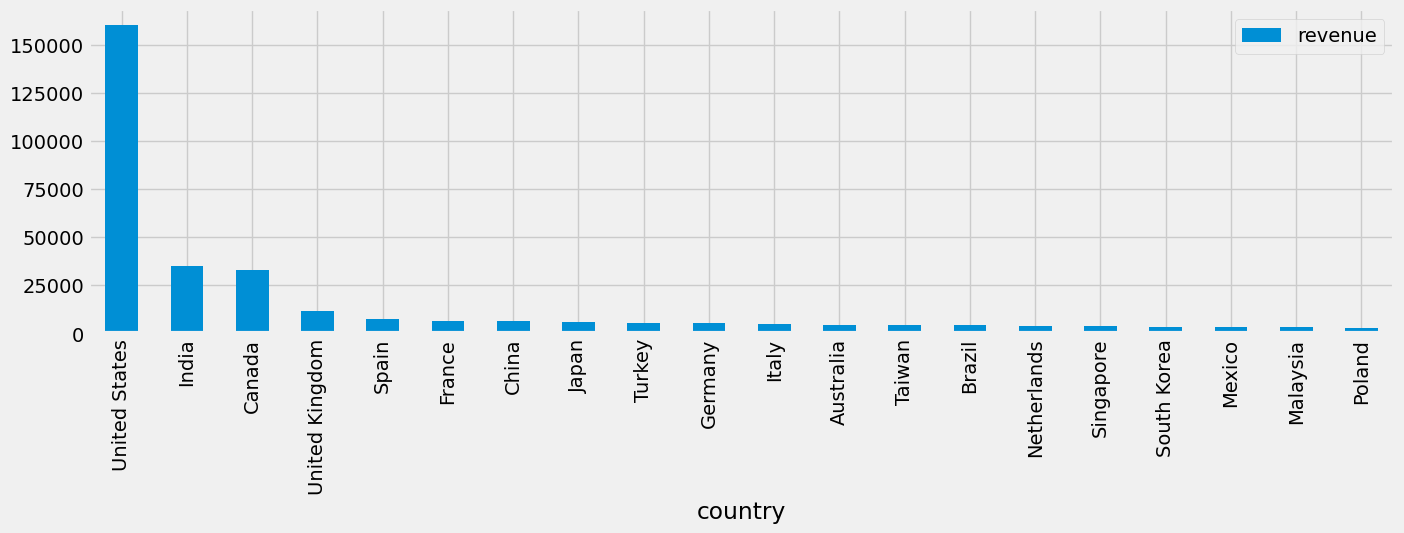

In [87]:
df.groupby('country')[['revenue']].sum().sort_values('revenue',ascending=False).head(20).reset_index().head(20).plot.bar(x='country',figsize=(15,4))

### Revenue Per Item Name

In [88]:
df.groupby(by='item_name')[['revenue']].sum().sort_values('revenue',ascending=False).head(10)#.reset_index().plot.bar(x='item_name',figsize=(10,4))

revenue
item_name                                       
Google Zip Hoodie F/C                    13788.0
Google Crewneck Sweatshirt Navy          10714.0
Google Men's Tech Fleece Grey             9965.0
Google Badge Heavyweight Pullover Black   9712.0
Super G Unisex Joggers                    9529.0
Google Crewneck Sweatshirt Green          8382.0
Google Sherpa Zip Hoodie Charcoal         6397.0
Google Men's Puff Jacket Black            6187.0
Google Men's Tech Fleece Vest Charcoal    5549.0
Google Women's Puff Jacket Black          5313.0

### Revenue Per Items categories

In [89]:
df.groupby(by='category_1')[['revenue']].sum().sort_values('revenue',ascending=False).head(10)#.reset_index().plot.bar(x='item_name',figsize=(10,4))

revenue
category_1                   
Apparel              171727.0
New                   25813.0
Bags                  23860.0
Campus Collection     20061.0
Accessories           17815.0
Uncategorized Items   17394.0
Shop by Brand         16960.0
Drinkware             15807.0
Lifestyle             13423.0
Clearance             11476.0

### How many purchases based on item_price and event_date

<AxesSubplot: xlabel='event_date'>

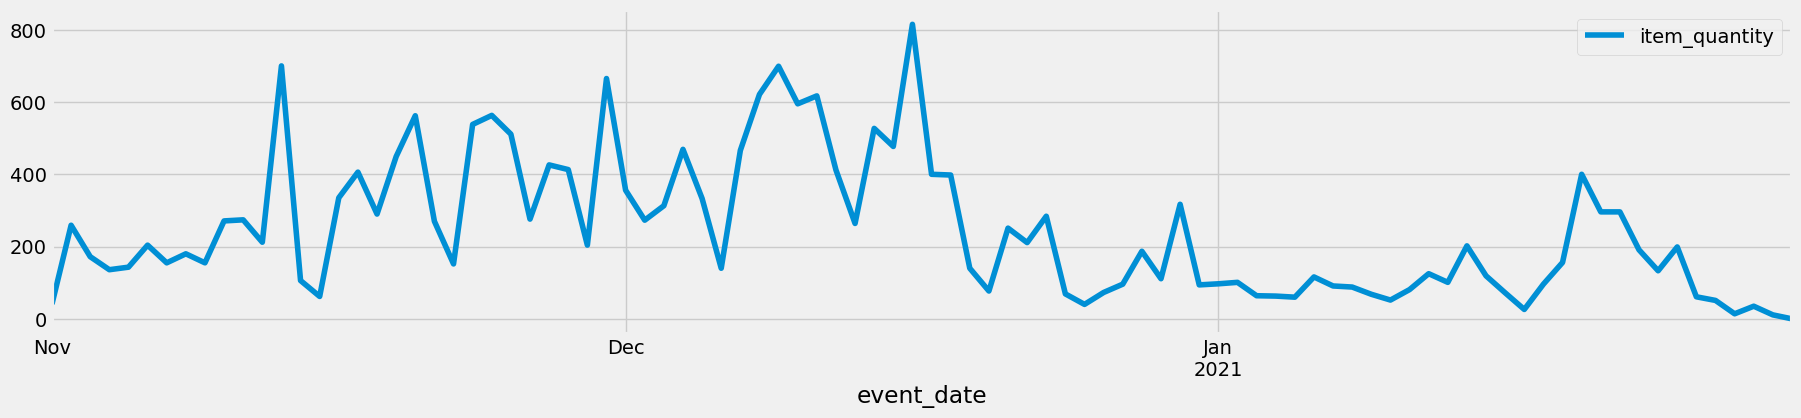

In [90]:
df[df['event_name']== 'purchase'].groupby(by='event_date')[['item_quantity']].sum().sort_values('event_date',ascending=True).reset_index().plot(x='event_date',figsize=(20,4))

In [91]:
#len(list(df['item_price'].unique()))

In [92]:
#len(list(df['item_name'].unique()))

### Purchases made by month, item_quantity/day , revenue/day & revenue/hour 

<AxesSubplot: xlabel='timestamp_month'>

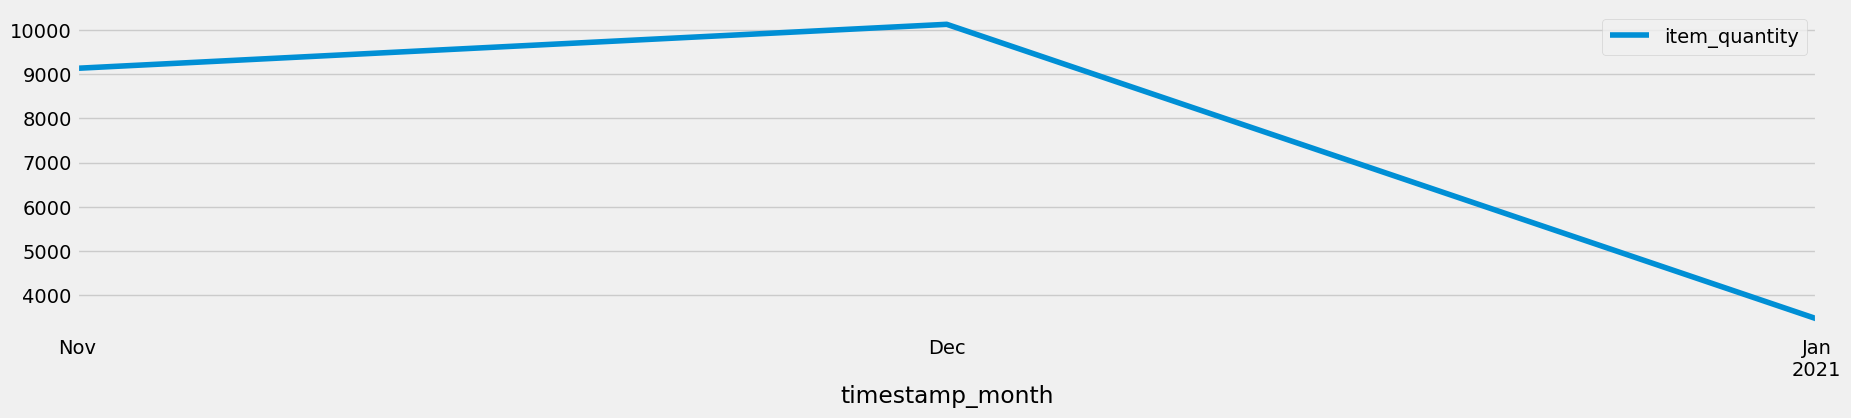

In [93]:
df[df['event_name']== 'purchase'].groupby(by='timestamp_month')[['item_quantity']].sum().sort_values('timestamp_month',ascending=False).reset_index().plot(x='timestamp_month',figsize=(20,4))

<AxesSubplot: xlabel='timestamp_day'>

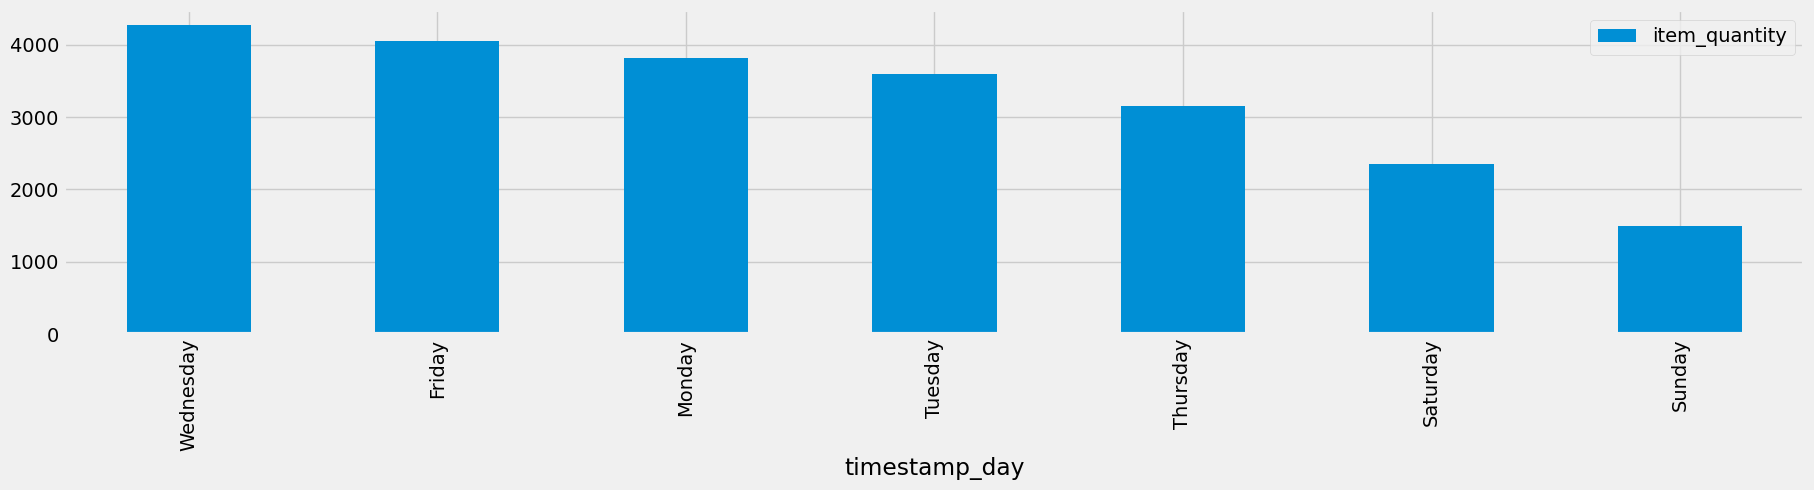

In [94]:
df[df['event_name']== 'purchase'].groupby(by='timestamp_day')[['item_quantity']].sum().sort_values('item_quantity',ascending=False).reset_index().plot.bar(x='timestamp_day',figsize=(20,4))

<AxesSubplot: xlabel='timestamp_day'>

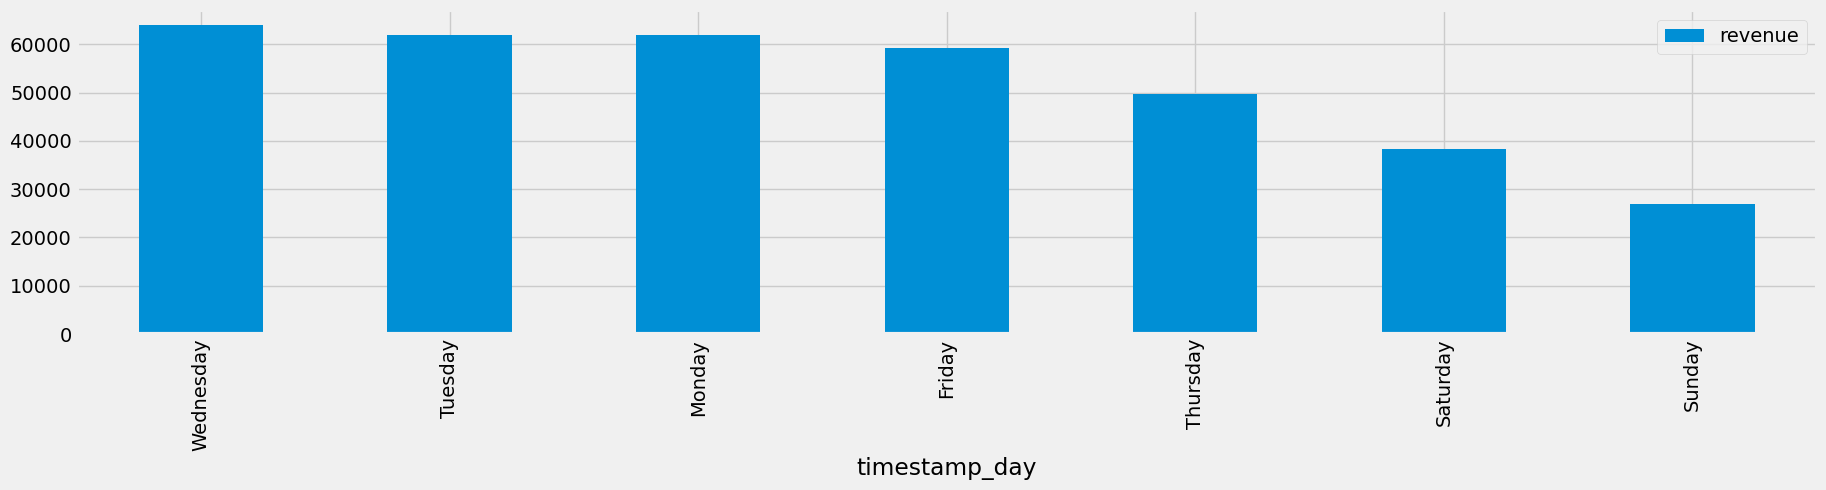

In [95]:
df[df['event_name']== 'purchase'].groupby(by='timestamp_day')[['revenue']].sum().sort_values('revenue',ascending=False).reset_index().plot.bar(x='timestamp_day',figsize=(20,4))

<AxesSubplot: xlabel='timestamp_hour'>

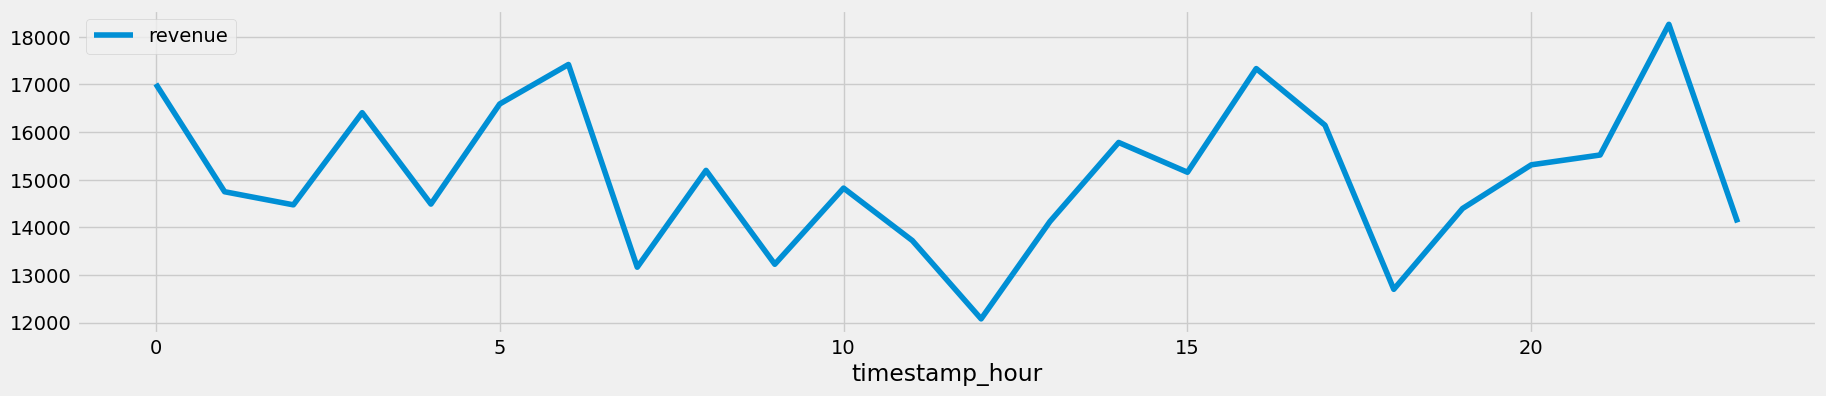

In [96]:
df[df['event_name']== 'purchase'].groupby(by='timestamp_hour')[['revenue']].sum().reset_index().plot(x='timestamp_hour',figsize=(20,4))

<AxesSubplot: xlabel='timestamp_hour'>

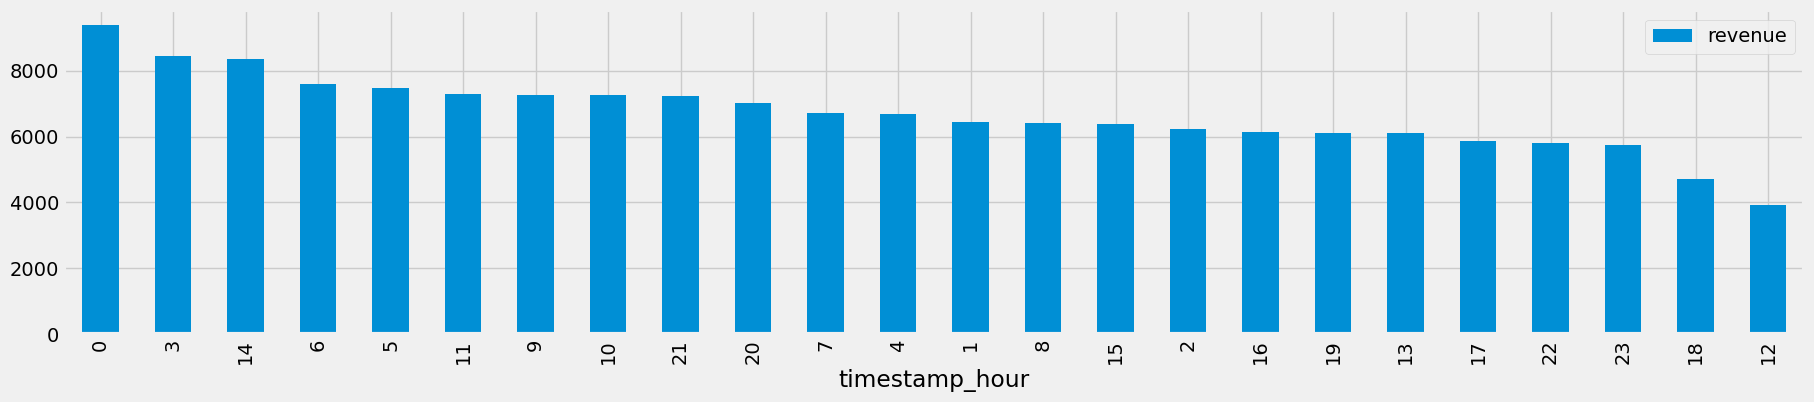

In [97]:
df[(df['event_name']== 'purchase') & (df['country'] == 'United States')].groupby(by='timestamp_hour')[['revenue']].sum().sort_values('revenue',ascending=False).reset_index().plot.bar(x='timestamp_hour',figsize=(20,4))

<AxesSubplot: xlabel='timestamp_hour'>

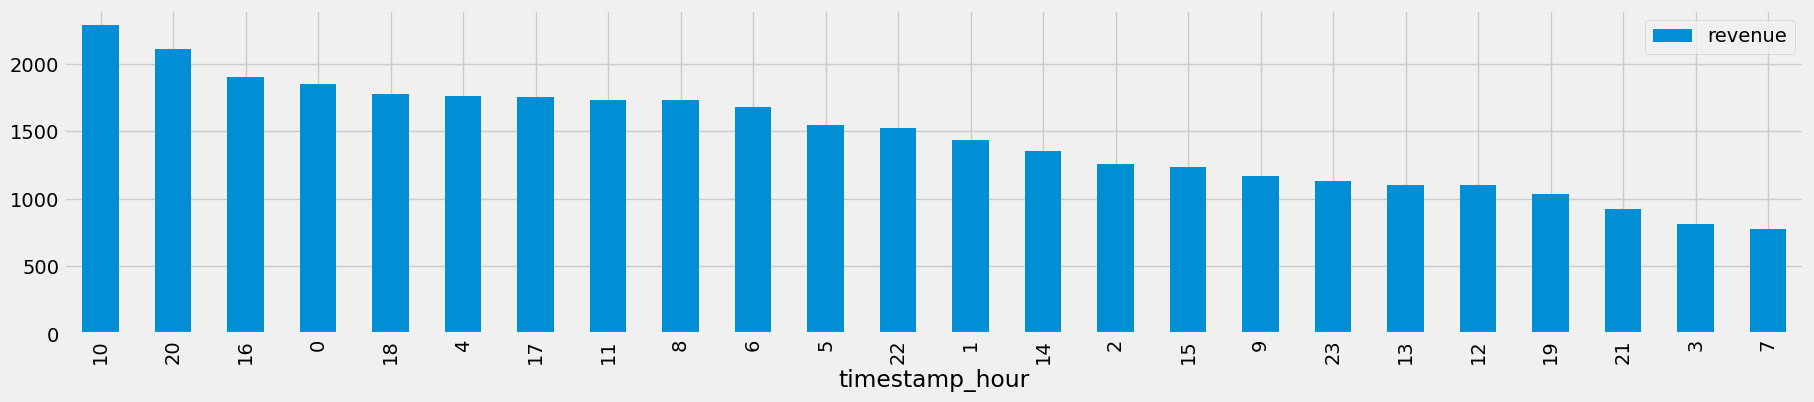

In [98]:
df[(df['event_name']== 'purchase') & (df['country'] == 'India')].groupby(by='timestamp_hour')[['revenue']].sum().sort_values('revenue',ascending=False).reset_index().plot.bar(x='timestamp_hour',figsize=(20,4))

<AxesSubplot: xlabel='timestamp_hour'>

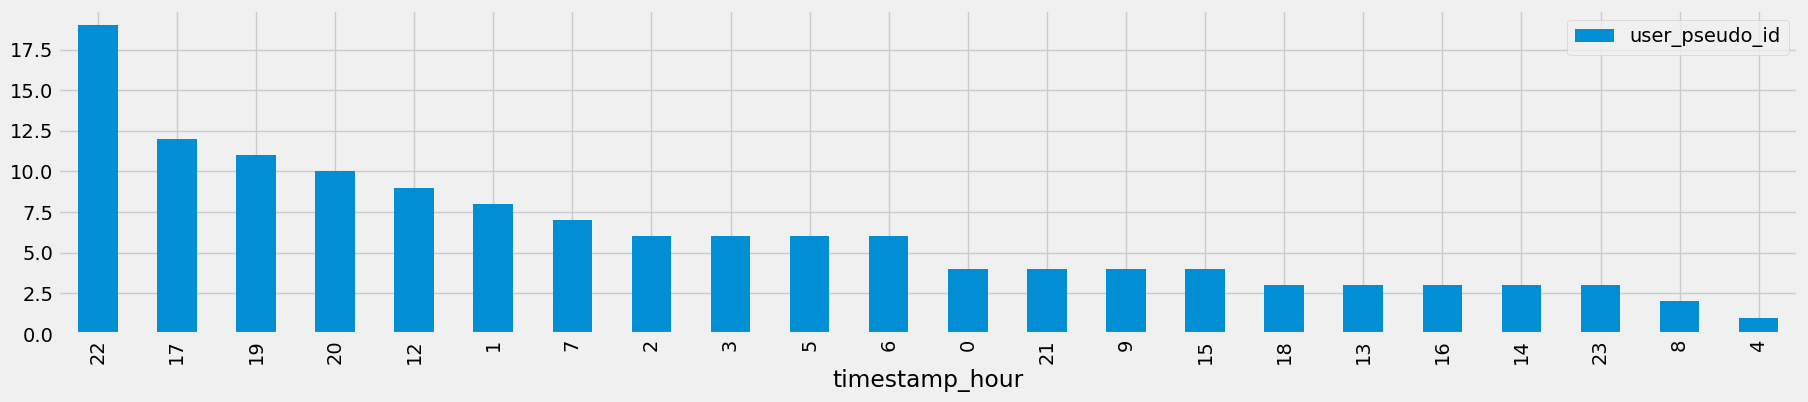

In [99]:
df[(df['event_name']== 'purchase') & (df['city'] == 'London')].groupby(by='timestamp_hour')[['user_pseudo_id']].count().sort_values('user_pseudo_id',ascending=False).reset_index().plot.bar(x='timestamp_hour',figsize=(20,4))

In [100]:
df[(df['event_name']== 'purchase') & (df['region'] == 'San Francisco')].groupby(by='timestamp_hour')[['user_pseudo_id']].count().sort_values('user_pseudo_id',ascending=False).reset_index()

Empty DataFrame
Columns: [timestamp_hour, user_pseudo_id]
Index: []

### Clustering qcut based on prices

In [101]:
df['item_price'].unique()

array([100.,  88.,  19.,   3.,  16.,   6.,  10.,  20.,  14.,  25.,   7.,
         5.,  71.,  24.,  32.,  70.,  28.,  46.,  15.,  18.,  13.,  89.,
        12.,  48.,  79.,  55.,  11.,  38.,  96.,  63.,  92.,  60.,   8.,
        22.,  17.,  44.,   4., 120.,   2.,  30., 115.,  21.,  50.,  99.,
        45.,   9.,  41.,  40.,  26.,  76.,  75.,  37.,  36.,  35.,  23.,
        69.,  33.,  62.,  61.,   1.,  58.,  56.,  27.,  53.,  49.,  43.,
        42.,  29.,  nan,  95.,  31., 313., 125.])

In [102]:
#df.groupby('item_price')[['item_quantity']].sum().sort_values('item_quantity',ascending=False)

In [103]:
#df['item_price'].unique().reset_index()#.sort_values()

In [104]:
df[df['event_name']== 'purchase'].groupby(by='key')[['event_date','item_price']]

In [105]:
#df["price_range"] = pd.qcut(df["item_price"].unique(),4, labels=[4, 3, 2, 1])

### Passing NewYork weather csv

In [106]:
df_weather = pd.read_csv('new_york_weather.csv')
#df_weather.head()

In [107]:
#df_weather.info()

In [108]:
#Turning the event_date column to datetime

df_weather['event_date']= pd.to_datetime(df_weather["event_date"], errors='ignore', format ='%Y%m%d')
df_weather['event_date']= pd.to_datetime(df_weather['event_date'])

In [109]:
#df_weather.describe()

### Different plotting to see correlations

<AxesSubplot: xlabel='event_date'>

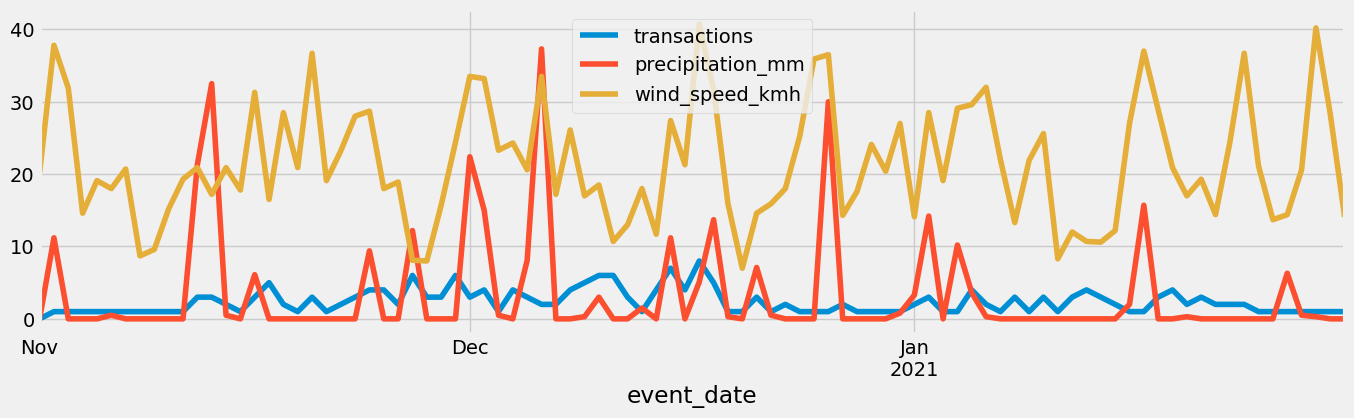

In [110]:
df_weather.plot(x='event_date',y= ['transactions','precipitation_mm','wind_speed_kmh'],figsize=(15,4))

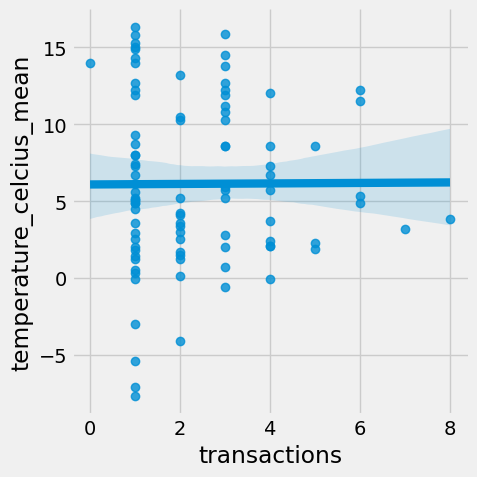

In [111]:
sns.lmplot(x="transactions", y="temperature_celcius_mean", data=df_weather)

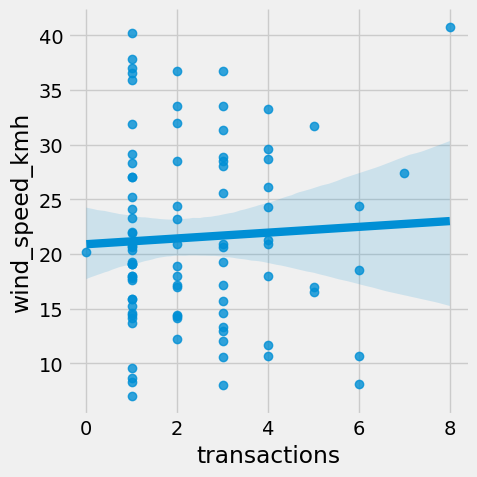

In [112]:
sns.lmplot(x="transactions", y="wind_speed_kmh", data=df_weather)

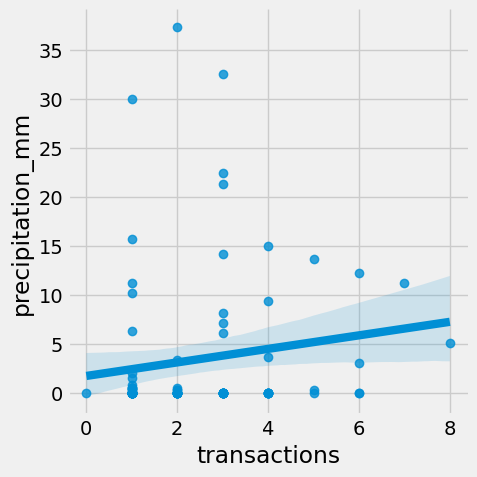

In [113]:
sns.lmplot(x="transactions", y="precipitation_mm", data=df_weather)

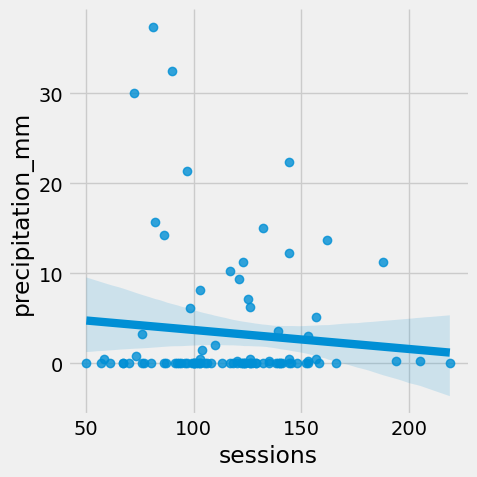

In [114]:
sns.lmplot(x="sessions", y="precipitation_mm", data=df_weather)

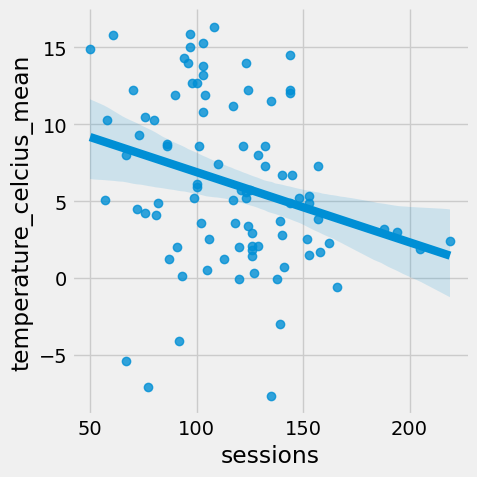

In [115]:
sns.lmplot(x="sessions", y="temperature_celcius_mean", data=df_weather)

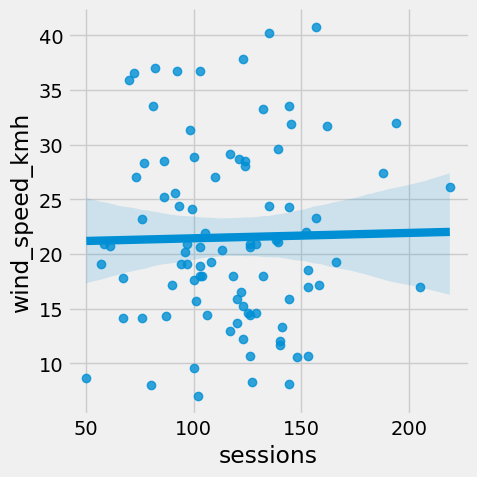

In [116]:
sns.lmplot(x="sessions", y="wind_speed_kmh", data=df_weather)

In [117]:
#Using corr() function

corellation = df_weather["temperature_celcius_mean"].corr(df_weather["sessions"])
corellation

-0.2768295460224727

Text(0, 0.5, 'sessions')

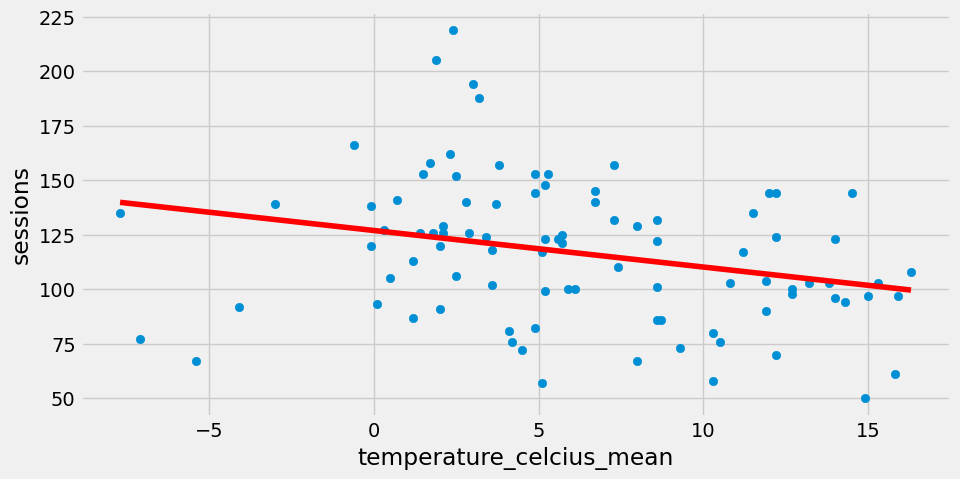

In [118]:
# plotting the data
plt.scatter(df_weather["temperature_celcius_mean"], df_weather["sessions"])
 
# This will fit the best line into the graph
plt.plot(np.unique(df_weather["temperature_celcius_mean"]), np.poly1d(np.polyfit(df_weather["temperature_celcius_mean"], df_weather["sessions"], 1))
         (np.unique(df_weather["temperature_celcius_mean"])), color='red')

plt.xlabel('temperature_celcius_mean')
plt.ylabel('sessions')

## Pareto Analysis

In [119]:
#Examine number of transactions per user_pseudo_id
customer_counts = df[(df['event_name']== 'purchase')]['user_pseudo_id'].value_counts().sort_values(ascending=False).reset_index()
customer_counts.columns = ['user_pseudo_id', 'count']
#customer_counts

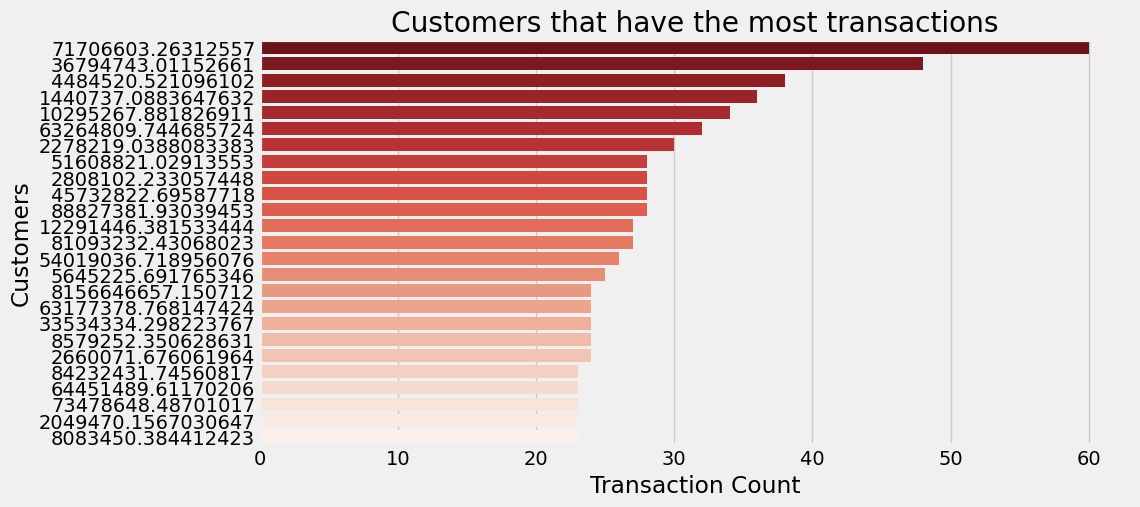

In [120]:
# Examine and Plot top25 customers

customer_counts_top25 = customer_counts.head(25)

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data=customer_counts_top25,x = customer_counts_top25["count"],y = customer_counts_top25["user_pseudo_id"],
            order = customer_counts_top25["user_pseudo_id"],  orient = 'h', palette = "Reds_r")

plt.title("Customers that have the most transactions")
plt.ylabel("Customers")
plt.xlabel("Transaction Count")

plt.show()

In [121]:
#Examine Total Sales per Product
product_sales = df[(df['event_name']== 'purchase')].groupby(['item_name'])['event_name'].agg('count').sort_values(ascending=False).reset_index()
#and df['item_name']!= '(not set)'
#product_sales

# RFM Analysis


In [122]:
df_purchase = df[(df['event_name']== 'purchase')]

In [123]:
#df_purchase.head()

In [124]:
# Find Recency. Take as reference day the maximum date

df_purchase['Recency'] = (df_purchase['event_timestamp_new'].max() - df_purchase['event_timestamp_new']).dt.days
df_purchase.head()

/var/folders/hl/0r3fbld566g2q0_dh3lc7mcw0000gn/T/ipykernel_11724/3425245880.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



user_pseudo_id event_name event_date   event_timestamp continent  \
0   7134559299.460105   purchase 2021-01-19  1611018792172903  Americas   
1   60695124.47422628   purchase 2020-12-10  1607595937529528      Asia   
2   37930099.37639175   purchase 2020-12-11  1607668690495989    Europe   
3   89140417.90026724   purchase 2020-12-30  1609369681078344      Asia   
4  27071010.171541177   purchase 2020-12-15  1608040284902110  Americas   

      sub_continent country            region           city platform  \
0  Northern America  Canada  British Columbia      (not set)      WEB   
1     Southern Asia   India        Tamil Nadu        Chennai      WEB   
2   Southern Europe   Italy         (not set)      (not set)      WEB   
3      Eastern Asia   China           Beijing        Beijing      WEB   
4  Northern America  Canada           Ontario  Richmond Hill      WEB   

  category mobile_brand_name mobile_model_name operating_system  \
0   mobile            Xiaomi           <Other>              Web   
1   mobile           Samsung           <Other>              Web   
2  desktop            Google            Chrome              Web   
3  desktop            Google            Chrome              Web   
4  desktop            Google        ChromeBook          <Other>   

  operating_system_version language          browser browser_version  \
0                       10    en-gb  Android Webview         <Other>   
1                       10      NaN  Android Webview         <Other>   
2                       10      NaN           Chrome            87.0   
3                  <Other>    en-us           Chrome         <Other>   
4                  <Other>       zh           Chrome            86.0   

     medium        name                           source  \
0  referral  (referral)  shop.googlemerchandisestore.com   
1   organic   (organic)                          <Other>   
2  referral  (referral)  shop.googlemerchandisestore.com   
3  referral  (referral)  shop.googlemerchandisestore.com   
4   organic   (organic)                           google   

                               item_name   brand  category_1  \
0                     Gift Card- $100.00     NaN  Gift Cards   
1           Google Incognito Techpack V2  Google        Bags   
2            Google Canteen Bottle Black  Google   Drinkware   
3  Google Laptop and Cell Phone Stickers  Google      Google   
4              Google Packable Bag Black  Google        Bags   

              variant item_index                 item_list_name     coupon  \
0  Single Option Only  (not set)  Not available in demo dataset  (not set)   
1  Single Option Only  (not set)                      (not set)  (not set)   
2  Single Option Only  (not set)                      (not set)  (not set)   
3  Single Option Only  (not set)  Not available in demo dataset  (not set)   
4  Single Option Only  (not set)                      (not set)  (not set)   

  item_location_id  item_price  user_ltv  item_quantity  revenue  promotion  \
0        (not set)       100.0      1200           12.0   1200.0         12   
1        (not set)        88.0      1260            8.0    704.0          1   
2        (not set)        19.0       576           30.0    576.0          1   
3        (not set)         3.0       480          160.0    480.0          1   
4        (not set)        16.0       525           30.0    480.0          1   

                                   key        event_timestamp_new  \
0   7134559299.460105-1611018792172903 2021-01-19 01:13:12.172903   
1   60695124.47422628-1607595937529528 2020-12-10 10:25:37.529528   
2   37930099.37639175-1607668690495989 2020-12-11 06:38:10.495989   
3   89140417.90026724-1609369681078344 2020-12-30 23:08:01.078344   
4  27071010.171541177-1608040284902110 2020-12-15 13:51:24.902110   

  timestamp_month timestamp_day  timestamp_hour  Recency  
0         2021-01       Tuesday               1       12  
1         2020-12      Thursday              10       52  

In [125]:
#df_purchase.info()

##### Create RFM Table

 For each customer find:
 
 Recency : minimum Recency
 
 Frequency: count unique number of days of purchases
 
 Monetary: summary of Total Sales


In [126]:
rfm = df_purchase.groupby(["user_pseudo_id"]).agg({'Recency': np.min,
                                      'event_timestamp_new': pd.Series.nunique,
                                     'revenue': np.sum}).reset_index()


#Rename columns
rfm.rename(columns={'Recency':'Recency','event_timestamp_new':'Frequency','revenue':'Monetary'},inplace= True)


#rfm

In [127]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
rfm["recency_score"] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],4,labels=[1,2,3,4])

rfm.head()

user_pseudo_id  Recency  Frequency  Monetary recency_score  \
0   10092926.37863064        9          1      89.0             4   
1  10111055.876868386       52          1      94.0             3   
2  1014825.0200289248       89          1     184.0             1   
3  1016446.8237887674       41          1      85.0             3   
4  10172849.537529336       53          1     155.0             2   

  frequency_score monetary_score  
0               1              3  
1               1              3  
2               1              4  
3               1              3  
4               1              4

In [128]:
rfm["user_pseudo_id"].nunique()

4418

In [129]:
rfm["RFM_Segment"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

rfm['RFM_Score'] = rfm[['recency_score','frequency_score','monetary_score']].sum(axis=1)
rfm.head()

user_pseudo_id  Recency  Frequency  Monetary recency_score  \
0   10092926.37863064        9          1      89.0             4   
1  10111055.876868386       52          1      94.0             3   
2  1014825.0200289248       89          1     184.0             1   
3  1016446.8237887674       41          1      85.0             3   
4  10172849.537529336       53          1     155.0             2   

  frequency_score monetary_score RFM_Segment  RFM_Score  
0               1              3         413          8  
1               1              3         313          7  
2               1              4         114          6  
3               1              3         313          7  
4               1              4         214          7

In [130]:
rfm.tail()

user_pseudo_id  Recency  Frequency  Monetary recency_score  \
4413  99387700.16724807       54          2     817.0             2   
4414  9957205.797520265       52          1     159.0             3   
4415    9963542.3978981       51          2     138.0             3   
4416   99826321.7020196        6          1      75.0             4   
4417  9992779.702150732       62          2      91.0             2   

     frequency_score monetary_score RFM_Segment  RFM_Score  
4413               4              4         244         10  
4414               4              4         344         11  
4415               4              4         344         11  
4416               4              3         443         11  
4417               4              3         243          9

In [131]:
# Use regex and dictionaries values to categorize numbers from customers
# 

segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
rfm['Segment_labels'] = rfm['RFM_Segment']
rfm['Segment_labels'] = rfm['Segment_labels'].replace(segt_map, regex=True)
rfm.head()

user_pseudo_id  Recency  Frequency  Monetary recency_score  \
0   10092926.37863064        9          1      89.0             4   
1  10111055.876868386       52          1      94.0             3   
2  1014825.0200289248       89          1     184.0             1   
3  1016446.8237887674       41          1      85.0             3   
4  10172849.537529336       53          1     155.0             2   

  frequency_score monetary_score RFM_Segment  RFM_Score Segment_labels  
0               1              3         413          8       High New  
1               1              3         313          7       High New  
2               1              4         114          6   Top at Risk   
3               1              3         313          7       High New  
4               1              4         214          7     Top Recent

In [132]:
#Exporting RFM analysis to csv for PowerBI

#rfm.to_csv('rfm.csv')

# Calculate Customers per Segments and all Stats per Segment


In [133]:
segements_grouped = rfm[["Segment_labels", "Recency","Frequency","Monetary"]].\
groupby("Segment_labels").agg(["mean","count","max"]).round().reset_index()


segements_grouped = rfm.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                                   "user_pseudo_id": pd.Series.nunique,
                                    "Recency": np.mean,                     
                                     "Frequency": np.mean,
                                                        }).reset_index()

segements_grouped["Monetary%"] = segements_grouped["Monetary"]/segements_grouped["Monetary"].sum()*100
segements_grouped["Count%"] = segements_grouped["user_pseudo_id"]/segements_grouped["user_pseudo_id"].sum()*100

segements_grouped.rename(columns={'Monetary':'TotalMonetary','user_pseudo_id':'TotalCustomers',
                                 'Recency':'MeanRecency','Frequency':'MeanFrequency',
                                 "Count%":"Customers%"},inplace= True)


segements_grouped = segements_grouped.sort_values(by=['Monetary%'], ascending=False)
segements_grouped


Segment_labels  TotalMonetary  TotalCustomers  MeanRecency  \
9         Top Recent        89516.0             473    47.945032   
11               VIP        71302.0             317    34.220820   
10      Top at Risk         65898.0             307    75.957655   
8    Need Activation        33976.0             760    77.771053   
1           High New        30587.0             426    40.847418   
2     High Promising        20500.0             273    30.919414   
6         Medium New        17547.0             455    43.279121   
7   Medium Potential         9339.0             240    34.083333   
0         High Loyal         8305.0             112    59.339286   
3          Low Loyal         6887.0             489    52.073620   
5       Medium Loyal         4943.0             124    58.927419   
4            Low New         3310.0             442     9.796380   

    MeanFrequency  Monetary%  Customers%  
9        1.355180  24.720665   10.706202  
11       2.340694  19.690702    7.175192  
10       1.820847  18.198338    6.948846  
8        1.200000   9.382784   17.202354  
1        1.000000   8.446881    9.642372  
2        1.439560   5.661263    6.179267  
6        1.000000   4.845765   10.298778  
7        1.208333   2.579051    5.432322  
0        1.232143   2.293502    2.535084  
3        1.026585   1.901908   11.068357  
5        1.112903   1.365055    2.806700  
4        1.117647   0.914087   10.004527

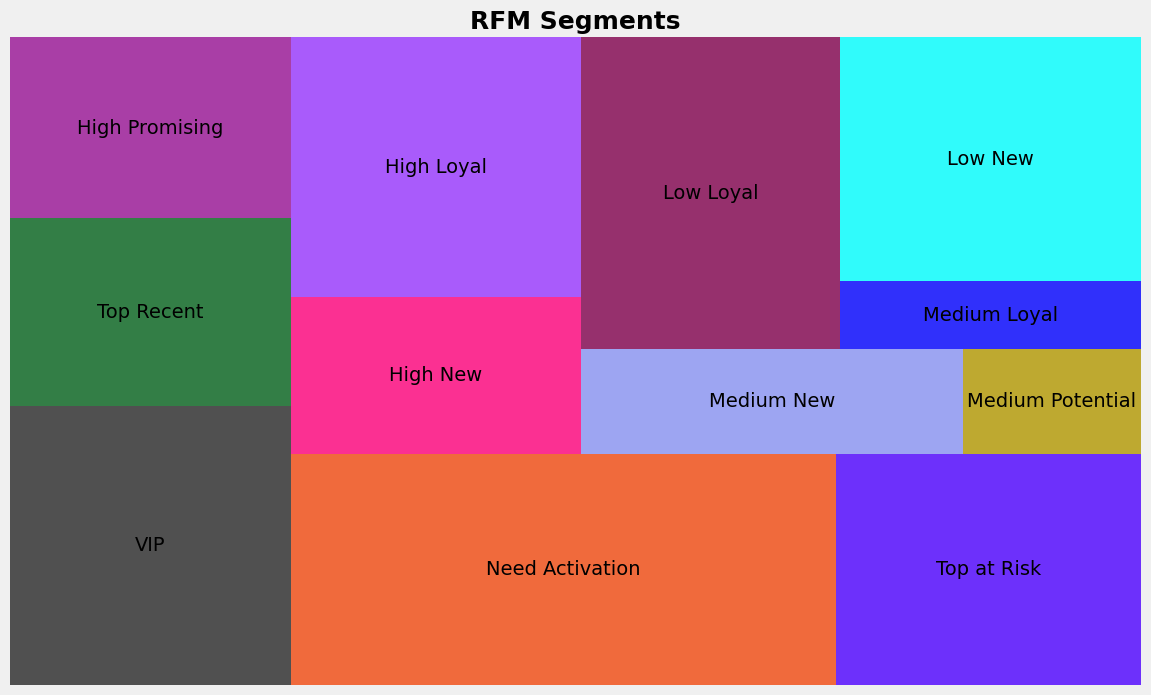

In [134]:
# Plot Segments in a Treemap


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
sq.plot(sizes=segements_grouped["Customers%"], 
                      label=['VIP', 
                            "Top Recent", 
                            'High Promising', 
                            'Need Activation', 
                            'Top at Risk', 
                            'High New', 
                            'High Loyal',
                            'Medium New',
                            'Medium Potential',
                            'Low Loyal',
                            'Medium Loyal',
                            'Low New'], 
                            alpha=0.8, 
                            color=["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C", "blue", "cyan"])#"#A4E919"
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()


## Pareto Analysis - Customers Segmentation

Here we'll try to analyze what % of customers produce what % of total sales.
In this way we'll be able to identify our most valuable customers.

In [135]:
segements_grouped

Segment_labels  TotalMonetary  TotalCustomers  MeanRecency  \
9         Top Recent        89516.0             473    47.945032   
11               VIP        71302.0             317    34.220820   
10      Top at Risk         65898.0             307    75.957655   
8    Need Activation        33976.0             760    77.771053   
1           High New        30587.0             426    40.847418   
2     High Promising        20500.0             273    30.919414   
6         Medium New        17547.0             455    43.279121   
7   Medium Potential         9339.0             240    34.083333   
0         High Loyal         8305.0             112    59.339286   
3          Low Loyal         6887.0             489    52.073620   
5       Medium Loyal         4943.0             124    58.927419   
4            Low New         3310.0             442     9.796380   

    MeanFrequency  Monetary%  Customers%  
9        1.355180  24.720665   10.706202  
11       2.340694  19.690702    7.175192  
10       1.820847  18.198338    6.948846  
8        1.200000   9.382784   17.202354  
1        1.000000   8.446881    9.642372  
2        1.439560   5.661263    6.179267  
6        1.000000   4.845765   10.298778  
7        1.208333   2.579051    5.432322  
0        1.232143   2.293502    2.535084  
3        1.026585   1.901908   11.068357  
5        1.112903   1.365055    2.806700  
4        1.117647   0.914087   10.004527

If we observe our results we will notice that VIP, Top Recent Customers and Top at Risk (23% of customers) produce 62% of Monetary Value (Sales).
It would be incorrect, though, to claim that the Pareto Rule does not apply here. This is because user_psedo_id is the unique code cookie stored per device. So if a user deletes their cookies or changes device, this id changes also.
We will check it also with the traditonal way and we will make the plot that verifies it.

We could apply our graph at first on our created segments and then on individual customers

In [136]:
segments_pareto = segements_grouped[["Segment_labels","TotalMonetary"]]
segments_pareto["CumulativePercentage"] = (segments_pareto["TotalMonetary"].cumsum()/ 
                                      segments_pareto["TotalMonetary"].sum()*100).round(2)

/var/folders/hl/0r3fbld566g2q0_dh3lc7mcw0000gn/T/ipykernel_11724/1539719322.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
#Exporting to csv for PowerBI

#segments_pareto.to_csv('segments_pareto.csv')

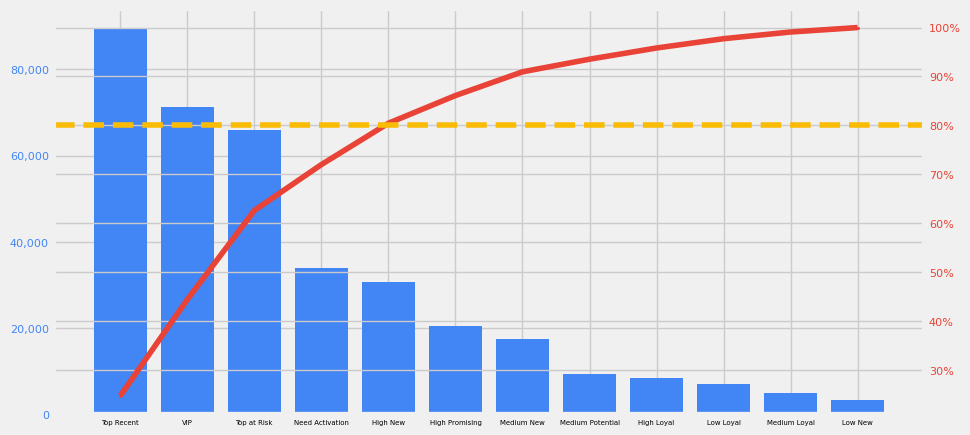

In [138]:


#define aesthetics for plot
color1 = '#4285F4'
color2 = '#E94236'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(segments_pareto['Segment_labels'], segments_pareto['TotalMonetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(segments_pareto['Segment_labels'], segments_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#FABB05", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 5)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()
plt.style.use('fivethirtyeight')

In [139]:
df_grouped = df_purchase.groupby("user_pseudo_id").\
    agg({"revenue": np.sum
        })

df_grouped = df_grouped.sort_values("revenue", ascending = False).reset_index()
#df_grouped

In [140]:
df_grouped["CumulativePercentage"] = (df_grouped["revenue"].cumsum()/ 
                                      df_grouped["revenue"].sum()*100).round(2)
                                      

#df_grouped

In [141]:
# We focus on the part between 79,9% and 80.1% of Sales to find from which number of Customers it is produced

df_grouped[(df_grouped["CumulativePercentage"]>79.9) & (df_grouped["CumulativePercentage"]<80.1)] 

user_pseudo_id  revenue  CumulativePercentage
1887   9038562615.484953     62.0                 79.91
1888   8643281.550965756     62.0                 79.93
1889   60946114.09003512     62.0                 79.95
1890   4705602.511717315     62.0                 79.97
1891   40815861.16381742     61.0                 79.98
1892  26530628.360236205     61.0                 80.00
1893   2941370.970066141     61.0                 80.02
1894   12877939.36944925     61.0                 80.03
1895  1532532525.0257375     61.0                 80.05
1896  29405563.933645163     61.0                 80.07
1897   4191504.897414736     61.0                 80.08

In [142]:
1892/len(df_grouped)

0.42824807605251247

So we see that they represent 42% of user pseudo ids.

In this way we just found out that the highest 42% of user_pseudo_ids produce 80% of total Sales.

Probably with a unique user id Pareto Principle would apply.

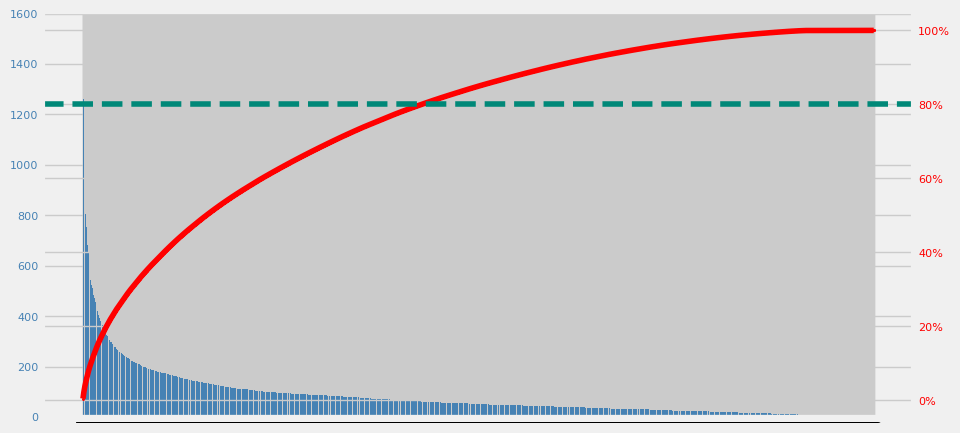

In [143]:

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_grouped['user_pseudo_id'], df_grouped['revenue'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_grouped['user_pseudo_id'], df_grouped['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])

ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 1)

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

## Pareto with LTV instead of Revenue

In [144]:
df_grouped = df_purchase.groupby("user_pseudo_id").\
    agg({"user_ltv": np.max
        })

df_grouped = df_grouped.sort_values("user_ltv", ascending = False).reset_index()
#df_grouped

In [145]:
df_grouped["CumulativePercentage"] = (df_grouped["user_ltv"].cumsum()/ 
                                      df_grouped["user_ltv"].sum()*100).round(2)
                                      

#df_grouped

In [146]:
# We focus on the part between 79,9% and 80.1% of Sales to find from which number of Customers it is produced

df_grouped[(df_grouped["CumulativePercentage"]>79.9) & (df_grouped["CumulativePercentage"]<80.1)] 

user_pseudo_id  user_ltv  CumulativePercentage
1876  1300033.4750122265        64                 79.92
1877  11330440.102237552        64                 79.93
1878   8806541.100090135        64                 79.95
1879   3678796.020952408        64                 79.97
1880   84733987.19987524        64                 79.98
1881  53066733.302484974        64                 80.00
1882   58454116.24978621        64                 80.02
1883   54054788.55243423        63                 80.04
1884   15894992.43285294        63                 80.05
1885   9147324811.334076        63                 80.07
1886   60946114.09003512        63                 80.09

In [147]:
1881/len(df_grouped)

0.4257582616568583

So we see that they represent 42% of user pseudo ids.

In this way we just found out that the highest 42% of user_pseudo_ids produce 80% of total Sales.

Probably with a unique user id Pareto Principle would apply.

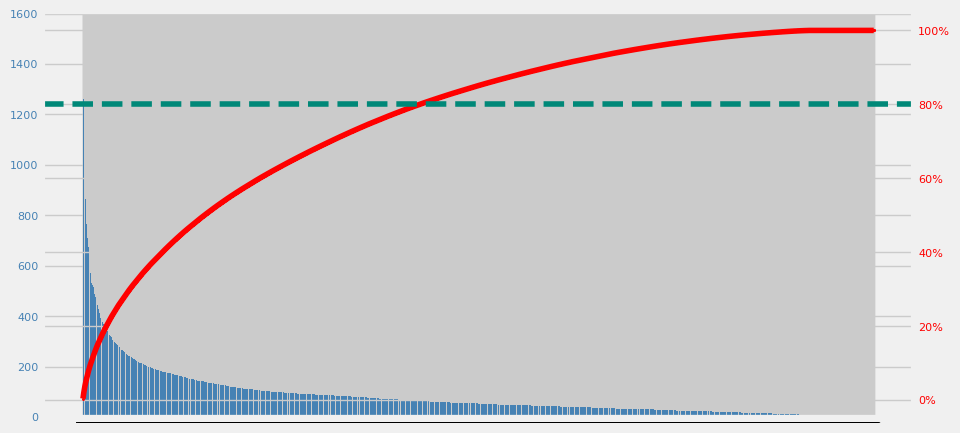

In [148]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_grouped['user_pseudo_id'], df_grouped['user_ltv'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_grouped['user_pseudo_id'], df_grouped['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])

ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 1)

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

## Cohort Analysis

In [149]:
# Create the cohort and order_month variables

df_purchase['order_day'] = df_purchase['event_timestamp_new'].dt.to_period('W')

/var/folders/hl/0r3fbld566g2q0_dh3lc7mcw0000gn/T/ipykernel_11724/2269773803.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
df_purchase['cohort']= df_purchase.groupby('user_pseudo_id')['event_timestamp_new'].transform('min').dt.to_period('W')

/var/folders/hl/0r3fbld566g2q0_dh3lc7mcw0000gn/T/ipykernel_11724/3777883958.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
#We aggregate the data per cohort and order_month and count the number of unique customers in each group.

df_cohort = df_purchase.groupby(['cohort', 'order_day']).agg(n_customers=('user_pseudo_id',
                                                                   'nunique')).reset_index(drop=False)

In [152]:
df_cohort['period_number'] = (df_cohort.order_day - df_cohort.cohort).apply(attrgetter('n'))
#df_cohort

In [153]:
# We aggregate the data per cohort and order_month and count the number of unique customers in each group.

cohort_pivot = df_cohort.pivot_table(index='cohort', 
                                     columns='period_number', 
                                     values='n_customers')
cohort_pivot

period_number             0     1     2     3    4    5    6    7    8    9   \
cohort                                                                         
2020-10-26/2020-11-01   13.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2020-11-02/2020-11-08  242.0   6.0   4.0   4.0  1.0  6.0  1.0  1.0  2.0  1.0   
2020-11-09/2020-11-15  318.0   8.0   5.0   9.0  8.0  2.0  1.0  2.0  NaN  NaN   
2020-11-16/2020-11-22  352.0   4.0   8.0  10.0  3.0  4.0  1.0  1.0  2.0  1.0   
2020-11-23/2020-11-29  484.0   9.0  13.0   8.0  5.0  NaN  1.0  NaN  1.0  3.0   
2020-11-30/2020-12-06  546.0  20.0   4.0   5.0  4.0  5.0  2.0  3.0  1.0  NaN   
2020-12-07/2020-12-13  680.0  16.0   4.0   3.0  1.0  6.0  3.0  3.0  NaN  NaN   
2020-12-14/2020-12-20  490.0   9.0   1.0   6.0  2.0  3.0  3.0  NaN  NaN  NaN   
2020-12-21/2020-12-27  201.0   3.0   NaN   3.0  1.0  2.0  NaN  NaN  NaN  NaN   
2020-12-28/2021-01-03  120.0   1.0   1.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN   
2021-01-04/2021-01-10  145.0   3.0   1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-01-11/2021-01-17  205.0   6.0   4.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-01-18/2021-01-24  347.0  12.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-01-25/2021-01-31  275.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   

period_number           10   11  
cohort                           
2020-10-26/2020-11-01  NaN  NaN  
2020-11-02/2020-11-08  NaN  NaN  
2020-11-09/2020-11-15  NaN  1.0  
2020-11-16/2020-11-22  2.0  NaN  
2020-11-23/2020-11-29  NaN  NaN  
2020-11-30/2020-12-06  NaN  NaN  
2020-12-07/2020-12-13  NaN  NaN  
2020-12-14/2020-12-20  NaN  NaN  
2020-12-21/2020-12-27  NaN  NaN  
2020-12-28/2021-01-03  NaN  NaN  
2021-01-04/2021-01-10  NaN  NaN  
2021-01-11/2021-01-17  NaN  NaN  
2021-01-18/2021-01-24  NaN  NaN  
2021-01-25/2021-01-31  NaN  NaN

In [154]:
#cohort_pivot.to_csv('cohort.csv')

In [155]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In the end we plot the retention matrix as a heatmap.
In order to show also the sizes of each cohort size, we created two heatmaps, where the one indicating the cohort size is using a white only colormap — grey color.


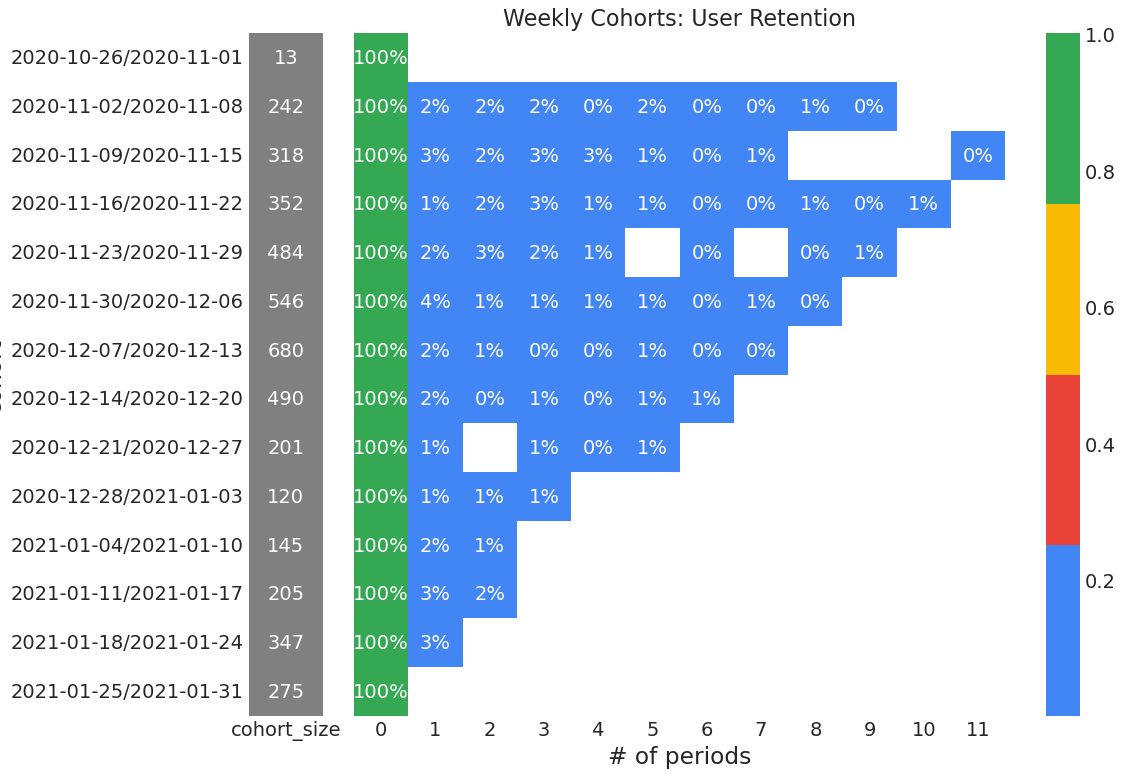

In [187]:
# Create an array with the colors you want to use
colors = ["#4285F4","#E94236", "#FABB05","#34A853"]
# Set your custom color palette
my_color = sns.set_palette(sns.color_palette(colors))




with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap=["#4285F4","#E94236", "#FABB05","#34A853"], 
                ax=ax[1])
    ax[1].set_title('Weekly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['Grey'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

my_color = sns.set_palette(sns.color_palette(colors))

##4285F4
#RdYlGn

# Market Basket Analysis / Association Rules

In [157]:
df_clean = df[df['item_name']!= '(not set)']
#| df['event_name']== 'purchase'| df['event_name']== 'add']

In [158]:
df_basket = df_clean[df_clean['event_name'].isin(['purchase','add_to_cart'])]

In [159]:
#df_basket.info()

In [160]:
#Rank the 5 most ordered products from most to least

df_basket.groupby("item_name").agg({"item_quantity":"sum"}).sort_values("item_quantity", ascending=False).head(5).reset_index()

item_name  item_quantity
0              Google Utility BackPack   2.343436e+09
1               #IamRemarkable Journal   1.000002e+08
2            Google Bot (Multicolored)   4.363662e+07
3  Google F/C Long Sleeve Tee Charcoal   2.000056e+07
4                  Google Knit Blanket   5.476621e+06

In [161]:
#Rank the 5 products with the most revenue

df_basket.groupby("item_name").agg({"revenue":"sum"}).sort_values("revenue", ascending=False).head(5).reset_index()

item_name  revenue
0                    Google Zip Hoodie F/C  13788.0
1          Google Crewneck Sweatshirt Navy  10714.0
2            Google Men's Tech Fleece Grey   9965.0
3  Google Badge Heavyweight Pullover Black   9712.0
4                   Super G Unisex Joggers   9529.0

In [162]:
# inputs
supp = 10 # minimum support of an assoc. rule (default: 10)
conf = 80 # minimum confidence of an assoc. rule (default: 80%)
report = 'aSCl'

In [163]:
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support of the empty set (total number of transactions)'
    }

In [164]:
Customers_Products=df_basket.groupby('user_pseudo_id')['item_name'].apply(list)
#Customers_Products

In [165]:
# Create list only with Customers and Products
Customers_Products=df_basket.groupby('user_pseudo_id')['item_name'].apply(list)


# Create list of lists to pass it into PyFim

Customers_Products_List=Customers_Products.to_list()
#Customers_Products_List

In [166]:
??arules

Type:        module
String form: <module 'arules' from '/Users/alkis/miniconda3/lib/python3.8/site-packages/arules/__init__.py'>
File:        ~/miniconda3/lib/python3.8/site-packages/arules/__init__.py
Source:     
from . import association_rules
from .association_rules import create_association_rules, present_rules_per_consequent, plot_rules


In [167]:
# Run apriori algorithm to creeate associations
result = arules(Customers_Products_List, supp=supp, conf=conf, report=report)

#Uncomment and run in case you want to see parameters of association rules
#??arules


#Creat dataframe wiht columns based on the report variables and sorted based on the "Associations_Sorted_based_on"
colnames = ['Cons_Product', 'antecedent'] + [report_colnames.get(k, k) for k in list(report)]
df_rules = pd.DataFrame(result, columns=colnames)
df_rules = df_rules.sort_values(report_colnames["a"], ascending=False)

#Change order of columns antecedent and consequent
df_rules = df_rules[['antecedent', 'Cons_Product']+ [report_colnames.get(k, k) for k in list(report)]]


#Print the numbers of rules created
print(df_rules.shape)

#Print top 10 and last 10 rules (the last 10 will be shown)
df_rules.head(10)


TypeError: 'module' object is not callable

The df_rules table is sorted according a = support_itemset_absolute so the top five combinations of 
products that are most found together are:

1) (Google Campus Bike Eco Tee Navy,) and Google Navy Speckled Tee	


In [ ]:
df_rules.sort_values(by=['confidence_pct'], ascending=False).head(10)

Now we have sorted our df based on confidence_pct which shows how many times customers that have firstly bought the antecedent product buy also the consequent product. The top 5 relationships show the below.

100% of customers that have already bought (Google Tee Green, Android Small Trace Journal Black, Android Super Hero 3D Framed Art, Google Tee Yellow, Android Techie 3D Framed Art, Google Women's Striped L/S) buy after Android Large Trace Journal Black	


In [ ]:
df_rules.sort_values(by=['lift'], ascending=False).head(10)

Now we have sorted our df based on lift which shows how many times more probable a customer is to buy the consequent product after he/she had already bought the antecedent product in comparison to any random customer.

A customer that have already bought (Google Glass Bottle,) are 8.9 times more probable to buy Google Cup Cap Tumbler Grey in comparison to any other random customer.

In [ ]:
df_google_trends = pd.read_csv('store_interest_by_date.csv') 
#for 'google merchandise store term worldwide'

In [ ]:
df_google_trends

In [ ]:
df_black_friday = pd.read_csv('black_friday_US.csv')

In [ ]:
df_black_friday

In [ ]:
df_store_interest_region = pd.read_csv('store_interest_by_region.csv')

In [ ]:
df_store_interest_region